**Import Libraries**

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
# To impute missing values
from sklearn.impute import KNNImputer

# To bin continuous data into intervals
from sklearn.preprocessing import KBinsDiscretizer

!pip install imblearn --user
!pip install imbalanced-learn --user
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import statsmodels.formula.api as smf
import math
from scipy.stats import zscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#mount and connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Import dataset "used_cars_data.csv"
data_original = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BankChurners.csv')

Mounted at /content/drive


Make a copy of original dataset

In [ ]:
#Copy of original dataset
data = data_original.copy()

In [ ]:
#Data shape
data.shape

(10127, 21)

In [ ]:
#Number of rows and columns
print(f'Number of rows: {data.shape[0]} and Number of columns: {data.shape[1]}')

Number of rows: 10127 and Number of columns: 21


In [ ]:
#Review sample of dataset
data.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8951,780108408,Existing Customer,52,M,2,Graduate,Married,$80K - $120K,Blue,37,...,3,1,34516.0,1369,33147.0,0.764,7745,82,0.640,0.040
4841,708549033,Existing Customer,50,F,1,High School,Married,Less than $40K,Blue,32,...,1,3,2055.0,1276,779.0,0.869,5025,70,0.707,0.621
8233,720260433,Existing Customer,46,F,3,High School,Married,$40K - $60K,Blue,34,...,3,2,3336.0,1687,1649.0,0.645,5577,95,0.759,0.506
230,772336458,Attrited Customer,60,F,1,Uneducated,Married,$40K - $60K,Blue,50,...,4,3,1438.3,1025,413.3,0.838,702,12,0.714,0.713
7356,713948808,Existing Customer,55,M,3,High School,Single,$60K - $80K,Blue,47,...,2,2,1602.0,962,640.0,0.834,4873,97,0.764,0.600
2833,708758658,Existing Customer,49,M,4,Graduate,Married,$80K - $120K,Blue,39,...,1,1,34516.0,543,33973.0,0.745,3951,76,0.900,0.016
3840,809797158,Existing Customer,42,M,2,Uneducated,Single,$80K - $120K,Blue,37,...,3,4,19366.0,1592,17774.0,0.679,3627,66,1.000,0.082
7172,708972783,Attrited Customer,48,F,4,College,Married,Less than $40K,Blue,37,...,2,3,1745.0,0,1745.0,0.657,2297,44,0.630,0.000
5189,709495833,Attrited Customer,44,F,2,Graduate,Single,Less than $40K,Blue,36,...,2,4,1438.3,0,1438.3,0.421,1944,36,0.500,0.000
839,710574558,Existing Customer,47,M,4,Graduate,Single,$80K - $120K,Blue,41,...,3,2,26442.0,1642,24800.0,0.651,1403,40,0.429,0.062


In [ ]:
#Review the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations**

*   There are (5) float64 datatypes
*   There are (10) interest 64 datatypes
*   There are (6) object datatypes
*   There is also some missing data in the marital_status and education_level columns



We will drop the CLIENTNUM column as this adds no value to the models.

In [ ]:
#Drop CLIENTNUM column as this adds no value to the model build
data.drop(['CLIENTNUM'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

In [ ]:
#Number of rows and columns
print(f'Number of rows: {data.shape[0]} and Number of columns: {data.shape[1]}')

Number of rows: 10127 and Number of columns: 20


In [ ]:
#Review unique values
pd.DataFrame(data.nunique())

,0
Attrition_Flag,2
Customer_Age,45
Gender,2
Dependent_count,6
Education_Level,6
Marital_Status,3
Income_Category,6
Card_Category,4
Months_on_book,44
Total_Relationship_Count,6


**Observations**

*   There are thousands of unique values for the Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt columns
*   There are also several hundred unique values for the Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio columns
*  Months_on_book and Customer_Age have 44 and 45 respectively unique values
*  The remaining columns have less thann 10 unique values in the columns



In [ ]:
#Review of duplicate values in the data
data.duplicated().sum()

0

There is no duplicated data in the dataset

In [ ]:
#Review missing data
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

**Observations**

*   There is 1,519 missing data points in the Education_Level column
*   There is 749 missing data points in the marital status column



In [ ]:
#Statistical analysis of the numerical data columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


**Observations**

*   **Customer_Age:** The mean age is 42.3 years old with a range of ages from 26-73 years old
*   **Dependent_count:** The mean Dependent_count is approximately 2.4 with a range of 0 to 5
*   **Months_on_book:** The mean Months_on_book is 36 with a range from 13 to 56 months
*   **Total_Relationship_Count:** The mean Total_Relationship_Count is approximately 3.8 with a range of 1 to 6
*   **Months_Inactive_12_mon:** The mean Months_Inactive_12_mon is 2.3 with a range from 0 to 6 months
*   **Contacts_Count_12_mon:** The mean Contacts_Count_12_mon is approximately 2.5 with a range of 0 to 6
*   **Credit_Limit:** The mean Credit_Limit is 8,632 with a range from 1,438 to 34,516
*   **Total_Revolving_Bal:** The mean Total_Revolving_Bal is approximately 1,163 with a range of 0 to 2,517
*   **Avg_Open_To_Buy:** The mean Avg_Open_To_Buy is 7,469 with a range from 3 to 34,516
*   **Total_Amt_Chng_Q4_Q1:** The mean Total_Amt_Chng_Q4_Q1 is approximately 0.76 with a range of 0 to 3.4
*   **Total_Trans_Amt:** The mean Total_Trans_Amt is 4,404 with a range from 510 to 18,484
*   **Total_Trans_Ct:** The mean Total_Trans_Ct is approximately 64.9 with a range of 10 to 139
*   **Total_Ct_Chng_Q4_Q1:** The mean Total_Ct_Chng_Q4_Q1 is 0.71 with a range from 0 to 3.7
*   **Avg_Utilization_Ratio:** The mean Total_Trans_Ct is approximately 0.27 with a range of 0 to 0.99



In [ ]:
#Statistical analysis of the non-numerical data columns
data.describe(exclude = np.number).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


**Observations**

*   **Attrition_Flag:** The top Attrition_Flag is Existing Customer
*   **Gender:** The top Gender is female
*   **Education_Level:** The top Education_Level is graduate
*   **Marital_Status:** The top Marital_Status is married
*   **Income_Category:** The top Income_Category is Less than $40K
*   **Card_Category:** The top Card_Category is Blue



In [ ]:
#List of all the categigorical datatypes
cat_col = data.select_dtypes("object").columns.to_list()

# Print all unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("*" * 80)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
********************************************************************************
F    5358
M    4769
Name: Gender, dtype: int64
********************************************************************************
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
********************************************************************************
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
********************************************************************************
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
********************************************************************************
Blue        9436
Silver       555

**Observations**

*   We can see that the Attrition_Flag feature is inbalanced
*   There is also an error in the income category (abc is not a valid amount). We will replace abc with NaN below.



In [ ]:
#Replace the abc values with NaN
data.Income_Category.replace(to_replace = "abc", value = np.nan, inplace=True)

In [ ]:
#We will now impute mode for all the missing values in the Income_Category
data.Income_Category = data.Income_Category.fillna(value=data["Income_Category"].value_counts().index[0])

In [ ]:
#List of all the categigorical datatypes
cat_col = data.select_dtypes("object").columns.to_list()

#Print unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("*" * 80)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
********************************************************************************
F    5358
M    4769
Name: Gender, dtype: int64
********************************************************************************
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
********************************************************************************
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
********************************************************************************
Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64
********************************************************************************
Blue        9436
Silver       555
Gold         116
Plati

In [ ]:
#Convert categorical features to category datatypes
cat_cols = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
data[cat_cols] = data[cat_cols].astype('category')

In [ ]:
#Review new datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

We will bin the age feature for better EDA.






In [ ]:
#Create age bins
data['Age_Binned'] = pd.cut(data['Customer_Age'], bins = [25, 35, 45,55, 65, 75], 
                            labels = ['25-34', '35-44', '45-54', '55-64','65 and older'])

In [ ]:
#Review the new binned ages
data['Age_Binned'].value_counts()

45-54           4135
35-44           3742
55-64           1321
25-34            919
65 and older      10
Name: Age_Binned, dtype: int64

**Observations**

*   Most of the clients in the dataset are aged between 35-54



We will bin the months_on_book feature for better EDA.

In [ ]:
#Create months bins
data['Months_Binned'] = pd.cut(data['Months_on_book'], bins = [10, 20, 30, 40, 50, 60], 
                            labels = ['10-19', '20-29', '30-39', '40-49','50 and over'])

In [ ]:
#Count the values in the months_binned 
data['Months_Binned'].value_counts()

30-39          5424
40-49          2065
20-29          1837
50 and over     418
10-19           383
Name: Months_Binned, dtype: int64

**Observations**

*   Here we see that 30-39 months on book are the most common with ~50% of the customers falling into this bin.



We will bin the credit_limit feature for better EDA.

In [ ]:
#Create credit bins
data['Credit_Binned'] = pd.cut(data['Credit_Limit'], bins = [1000, 10000, 20000, 30000, 40000], 
                            labels = ['$1,000-9,999', '$10,000-19,000', '$20,000-29,000', '$30,000-39,000'])

In [ ]:
#Count the values in the credit_binned
data['Credit_Binned'].value_counts()

$1,000-9,999      7373
$10,000-19,000    1490
$30,000-39,000     667
$20,000-29,000     597
Name: Credit_Binned, dtype: int64

**Observations**

*   The majority of customers have below $10,000 credit limits



We will bin the total revolving balance feature for better EDA.

In [ ]:
#Create Total_Revolving_Bal bins
data['RevBal_Binned'] = pd.cut(data['Total_Revolving_Bal'], bins = [0, 500, 1000, 1500, 2000, 2500, 3000], 
                            labels = ['$0-499', '$500-999', '$1,000-1,499', '$1,500-1,900', '$2,000-2,499', "$2,500+"])

In [ ]:
#Count the values in the rev_bal bins
data['RevBal_Binned'].value_counts()

$1,500-1,900    2291
$1,000-1,499    2258
$500-999        1317
$2,000-2,499    1136
$2,500+          529
$0-499           126
Name: RevBal_Binned, dtype: int64

**Observations**

*   Close to 50% of the customers in this dataset have a revolving balance between \$1,000 - $1,999.



We will bin the avg open to buy feature for better EDA.

In [ ]:
#Create Avg_Open_To_Buy bins
data['Avg_Binned'] = pd.cut(data['Avg_Open_To_Buy'], bins = [0, 10000, 20000, 30000, 40000], 
                            labels = ['$0-9,999', '$10,000-19,000', '$20,000-29,000', '$30,000-39,000'])

In [ ]:
#Count the values in the age_binned
data['Avg_Binned'].value_counts()

$0-9,999          7631
$10,000-19,000    1329
$30,000-39,000     623
$20,000-29,000     544
Name: Avg_Binned, dtype: int64

**Observations**

*   ~75% of customers in this dataset reside in the <$10,000 avg open to buy bin



## **Univariate Analysis**

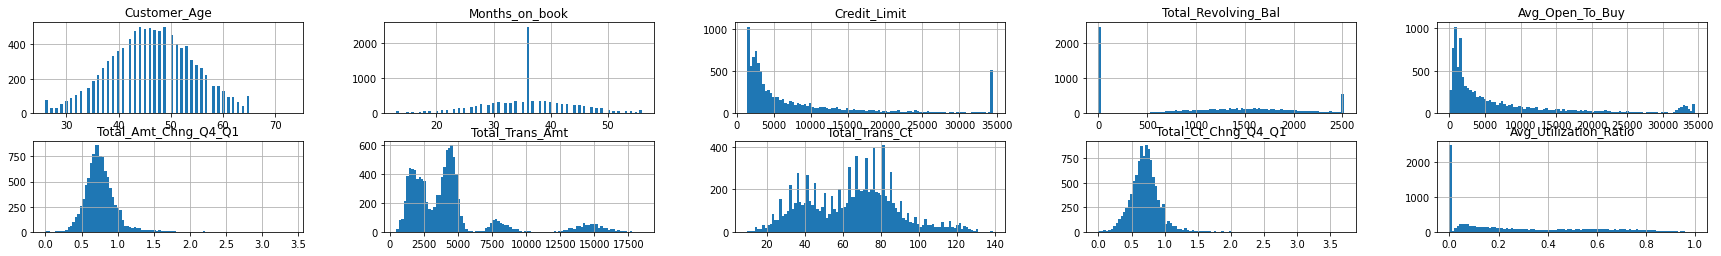

In [ ]:
#View the continuous data 
columns = list(data)[0:-1]
data[columns].hist(stacked=False, bins=100, figsize=(30,30), layout=(14,5));

**Observations**

*   Customer Age appears almost normally distributed
*   Months on book is almost normallt distributed sans the huge jump at the 36-37 month mark
*  Credit limit is right skewed



In [ ]:
#Create a function for univariate analysis (code used from Class Module)
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    ) 
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")

In [ ]:
#Create function for outlier identification
def feature_outliers(feature: str, data = data):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

**Customer Age**

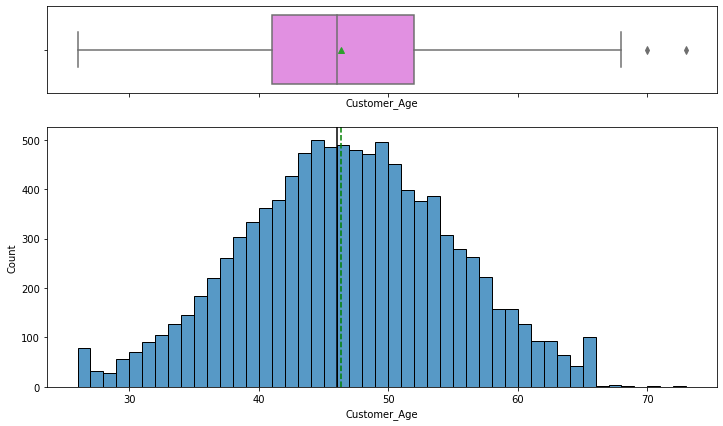

In [ ]:
#Histogram/Boxplot for customer age analysis
histogram_boxplot(data, "Customer_Age")

In [ ]:
#Mean of Customer_Age
data.Customer_Age.mean()

46.32596030413745

In [ ]:
#Median of Customer_Age
data.Customer_Age.median()

46.0

In [ ]:
#Mode of Customer_Age
data.Customer_Age.mode()

0    44
dtype: int64

**Observations**

*   Mean age is 46
*   Median age is 46
*   Mode for age is 44



In [ ]:
#Evaluate outliers of age
age_outliers = feature_outliers('Customer_Age')
age_outliers.sort_values(by = 'Customer_Age', ascending = False)
age_outliers

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned
251,Existing Customer,73,M,0,High School,Married,$40K - $60K,Blue,36,5,...,1.363,1765,34,1.615,0.252,65 and older,30-39,"$1,000-9,999","$1,000-1,499","$0-9,999"
254,Existing Customer,70,M,0,High School,Married,Less than $40K,Blue,56,3,...,0.581,1227,15,0.875,0.460,65 and older,50 and over,"$1,000-9,999","$1,000-1,499","$0-9,999"


**Observations**

*   There are (2) identified outliers in the dataset for age (two males, aged 70 and 73, respectively)



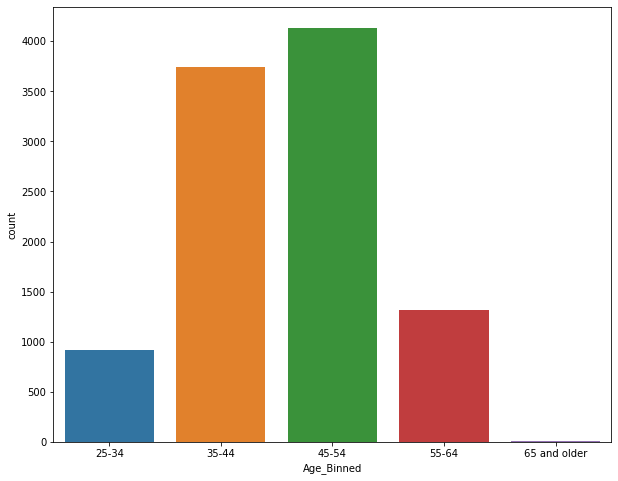

In [ ]:
#Countplot of the Age Binned column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Age_Binned', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Months_on_Book**

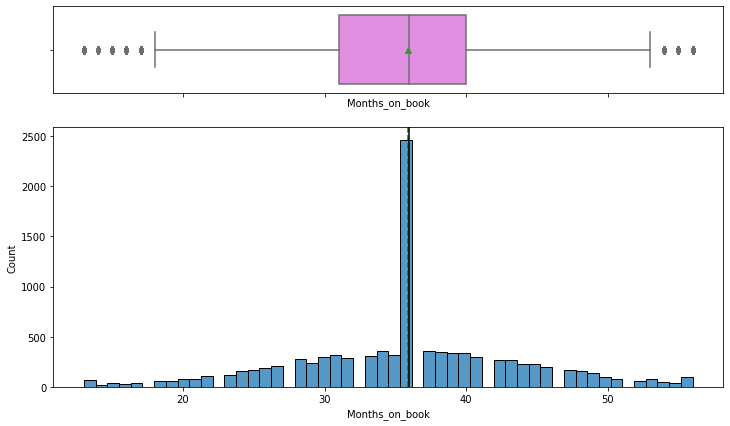

In [ ]:
#Histogram/Boxplot for months on book analysis
histogram_boxplot(data, "Months_on_book")

In [ ]:
#Mean of months on book
data.Months_on_book.mean()

35.928409203120374

In [ ]:
#Median of months on book
data.Months_on_book.median()

36.0

In [ ]:
#Mode of months on book
data.Months_on_book.mode()

0    36
dtype: int64

**Observations**

*   All central measures of tendency appear to be the same




In [ ]:
#Evaluate outliers of months on book
mob = feature_outliers('Months_on_book')
mob.sort_values(by = 'Months_on_book', ascending = False)
mob

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned
11,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,...,1.433,1314,26,1.364,0.174,55-64,50 and over,"$1,000-9,999","$1,500-1,900","$0-9,999"
18,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,2,...,1.831,1336,30,1.143,0.788,55-64,50 and over,"$1,000-9,999","$2,500+","$0-9,999"
27,Existing Customer,63,M,1,NaN,Married,$60K - $80K,Blue,56,3,...,0.843,1904,40,1.000,0.099,55-64,50 and over,"$10,000-19,000","$1,000-1,499","$0-9,999"
39,Attrited Customer,66,F,0,Doctorate,Married,Less than $40K,Blue,56,5,...,1.052,704,16,0.143,0.077,65 and older,50 and over,"$1,000-9,999",$500-999,"$0-9,999"
52,Existing Customer,66,F,0,High School,Married,Less than $40K,Blue,54,3,...,1.224,1946,38,1.923,0.687,65 and older,50 and over,"$1,000-9,999","$2,000-2,499","$0-9,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,Attrited Customer,33,F,1,Doctorate,Single,Less than $40K,Blue,15,1,...,0.645,8130,74,0.897,0.318,25-34,10-19,"$1,000-9,999","$1,000-1,499","$0-9,999"
10062,Existing Customer,29,M,2,College,Married,$40K - $60K,Blue,17,3,...,0.731,14740,102,0.759,0.266,25-34,10-19,"$1,000-9,999","$1,000-1,499","$0-9,999"
10069,Existing Customer,31,M,2,Graduate,Single,Less than $40K,Blue,14,4,...,0.656,15585,115,0.917,0.270,25-34,10-19,"$1,000-9,999","$1,500-1,900","$0-9,999"
10107,Attrited Customer,61,M,0,Graduate,Single,$60K - $80K,Blue,54,2,...,0.866,8930,79,0.837,0.139,55-64,50 and over,"$10,000-19,000","$1,500-1,900","$10,000-19,000"


**Observations**

*   There are 386 rows identified as outliers for the months_on_book feature



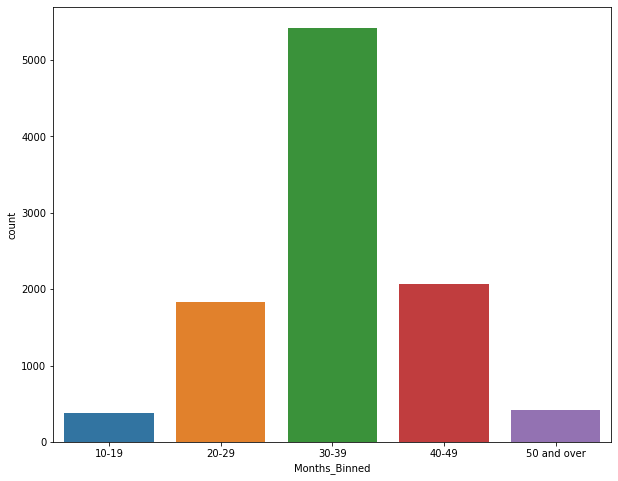

In [ ]:
#Countplot of the Months Binned column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Months_Binned', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Credit Limit**

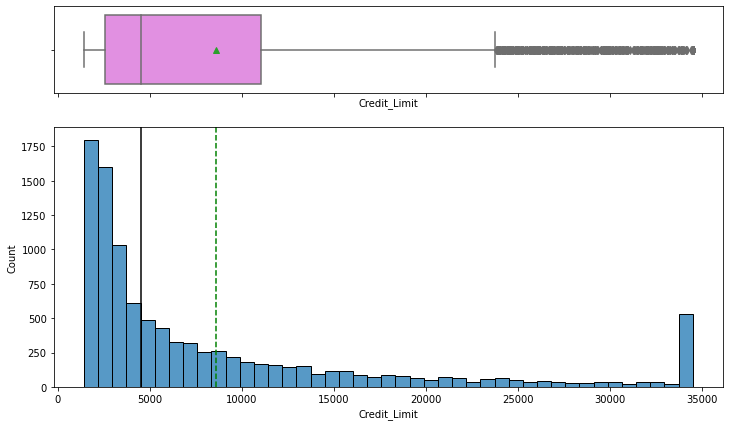

In [ ]:
#Histogram/Boxplot for credit limit analysis
histogram_boxplot(data, "Credit_Limit")

In [ ]:
#Mean of credit limit
data.Credit_Limit.mean()

8631.953698034955

In [ ]:
#Median of credit limit
data.Credit_Limit.median()

4549.0

In [ ]:
#Mode of credit limit
data.Credit_Limit.mode()

0    34516.0
dtype: float64

**Observations**

*   Mean credit limit is \$8,631.95
*   Median credit limit is \$4,549
*   The mode for the credit limit feature is \$34,516
*   The difference in the central measures of tendencies here would indicate a large number of outliers (we will confirm below)



In [ ]:
#Evaluate outliers of credit limit
cl = feature_outliers('Credit_Limit')
cl.sort_values(by = 'Credit_Limit', ascending = False)
cl

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned
6,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,...,1.975,1330,31,0.722,0.066,45-54,40-49,"$30,000-39,000","$2,000-2,499","$30,000-39,000"
7,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,...,2.204,1538,36,0.714,0.048,25-34,20-29,"$20,000-29,000","$1,000-1,499","$20,000-29,000"
16,Existing Customer,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,6,...,1.708,1671,27,0.929,0.078,45-54,30-39,"$30,000-39,000","$2,000-2,499","$20,000-29,000"
40,Existing Customer,45,M,3,Graduate,Single,$80K - $120K,Blue,41,2,...,1.042,1109,28,0.474,0.018,35-44,40-49,"$30,000-39,000",$500-999,"$30,000-39,000"
45,Existing Customer,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,3,...,1.621,1444,28,1.333,0.000,45-54,20-29,"$30,000-39,000",NaN,"$30,000-39,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10098,Attrited Customer,55,M,3,Graduate,Single,$120K +,Silver,36,4,...,1.007,9931,70,0.750,0.000,45-54,30-39,"$30,000-39,000",NaN,"$30,000-39,000"
10100,Existing Customer,39,M,2,Graduate,NaN,$60K - $80K,Silver,36,4,...,0.669,16098,128,0.684,0.000,35-44,30-39,"$20,000-29,000",NaN,"$20,000-29,000"
10104,Existing Customer,51,M,3,Graduate,Single,$60K - $80K,Silver,36,3,...,0.667,14638,93,0.722,0.059,45-54,30-39,"$20,000-29,000","$1,500-1,900","$20,000-29,000"
10110,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,...,0.640,15274,108,0.714,0.032,55-64,40-49,"$30,000-39,000","$1,000-1,499","$30,000-39,000"


**Observations**

*  There are 984 outliers in the credit limit features

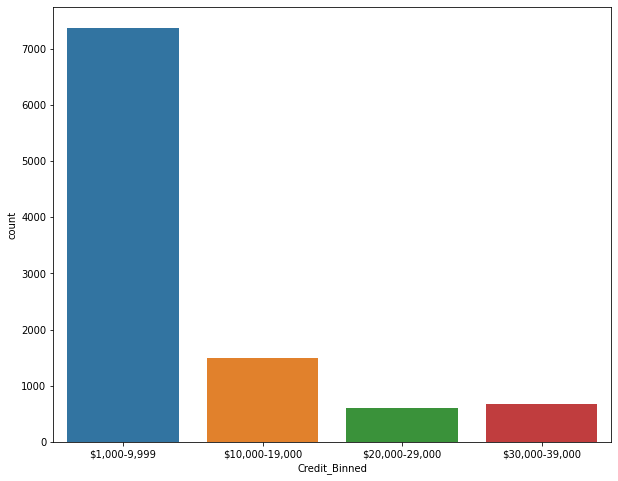

In [ ]:
#Countplot of the Credit Binned column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Credit_Binned', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Total Revolving Balance**

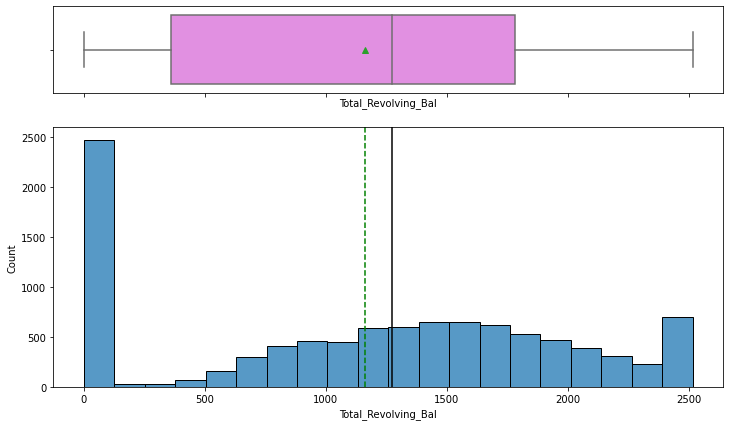

In [ ]:
#Histogram/Boxplot for Total Revolving Balance analysis
histogram_boxplot(data, "Total_Revolving_Bal")

In [ ]:
#Mean of total revolving balance
data.Total_Revolving_Bal.mean()

1162.8140614199665

In [ ]:
#Median of total revolving balance
data.Total_Revolving_Bal.median()

1276.0

In [ ]:
#Mode of total revolving balance
data.Total_Revolving_Bal.mode()

0    0
dtype: int64

**Obseravtions**

*   The mean total revolving balance is \$1,162.82
*   The median total revolving balance is \$1,276
*   The mode total revolving balance is \$0



In [ ]:
#Evaluate outliers of total revolving balance
trb = feature_outliers('Total_Revolving_Bal')
trb.sort_values(by = 'Total_Revolving_Bal', ascending = False)
trb

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned


**Observations**

There are no outliers for this feature

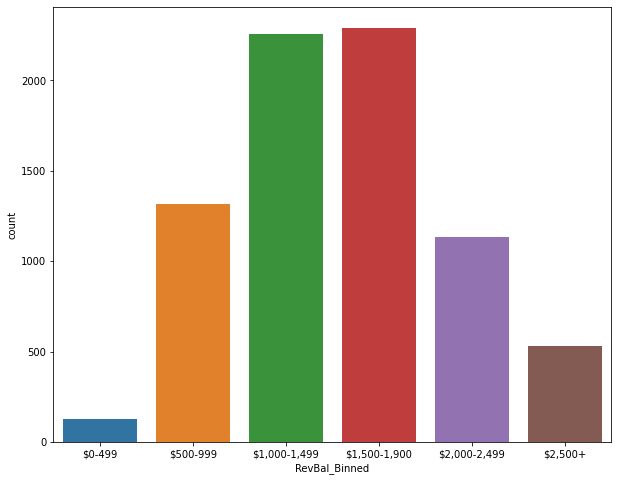

In [ ]:
#Countplot of the Total Revolving Balance Binned column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'RevBal_Binned', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Avg Open to Buy**

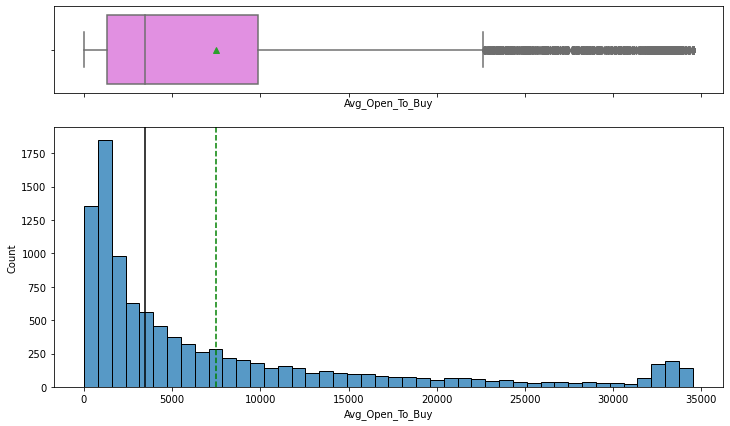

In [ ]:
#Histogram/Boxplot for Total Revolving Balance analysis
histogram_boxplot(data, "Avg_Open_To_Buy")

In [ ]:
#Mean of total average open to buy
data.Avg_Open_To_Buy.mean()

7469.139636614989

In [ ]:
#Median of total average open to buy
data.Avg_Open_To_Buy.median()

3474.0

In [ ]:
#Mode of total average open to buy
data.Avg_Open_To_Buy.mode()

0    1438.3
dtype: float64

**Observations**

*   The mean total revolving balance is \$7,469.14
*   The median total revolving balance is \$3,474
*   The mode total revolving balance is \$1,438.30
*   This would also indicate a large number of outliers

In [ ]:
#Evaluate outliers of Avg_Open_To_Buy
aotb = feature_outliers('Avg_Open_To_Buy')
aotb.sort_values(by = 'Avg_Open_To_Buy', ascending = False)
aotb

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned
6,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,...,1.975,1330,31,0.722,0.066,45-54,40-49,"$30,000-39,000","$2,000-2,499","$30,000-39,000"
7,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,...,2.204,1538,36,0.714,0.048,25-34,20-29,"$20,000-29,000","$1,000-1,499","$20,000-29,000"
16,Existing Customer,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,6,...,1.708,1671,27,0.929,0.078,45-54,30-39,"$30,000-39,000","$2,000-2,499","$20,000-29,000"
40,Existing Customer,45,M,3,Graduate,Single,$80K - $120K,Blue,41,2,...,1.042,1109,28,0.474,0.018,35-44,40-49,"$30,000-39,000",$500-999,"$30,000-39,000"
45,Existing Customer,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,3,...,1.621,1444,28,1.333,0.000,45-54,20-29,"$30,000-39,000",NaN,"$30,000-39,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,Existing Customer,39,M,2,Graduate,NaN,$60K - $80K,Silver,36,4,...,0.669,16098,128,0.684,0.000,35-44,30-39,"$20,000-29,000",NaN,"$20,000-29,000"
10103,Attrited Customer,51,M,1,High School,Married,$80K - $120K,Blue,36,4,...,0.799,8531,77,0.791,0.000,45-54,30-39,"$20,000-29,000",NaN,"$20,000-29,000"
10104,Existing Customer,51,M,3,Graduate,Single,$60K - $80K,Silver,36,3,...,0.667,14638,93,0.722,0.059,45-54,30-39,"$20,000-29,000","$1,500-1,900","$20,000-29,000"
10110,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,...,0.640,15274,108,0.714,0.032,55-64,40-49,"$30,000-39,000","$1,000-1,499","$30,000-39,000"


**Observations**

*   There are 963 outliers for this feature



**Total_Amt_Chng_Q4_Q1**

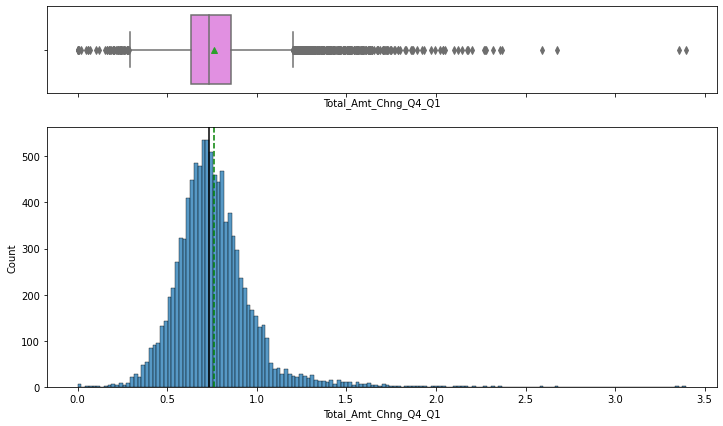

In [ ]:
#Histogram/Boxplot for Total_Amt_Chng_Q4_Q1 analysis
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

In [ ]:
#Mean of Total_Amt_Chng_Q4_Q1 to buy
data.Total_Amt_Chng_Q4_Q1.mean()

0.7599406536980349

In [ ]:
#Median of Total_Amt_Chng_Q4_Q1 to buy
data.Total_Amt_Chng_Q4_Q1.median()

0.736

In [ ]:
#Mode of Total_Amt_Chng_Q4_Q1 to buy
data.Total_Amt_Chng_Q4_Q1.mode()

0    0.791
dtype: float64

**Observations**

*   The mean total revolving balance is 0.76
*   The median total revolving balance is 0.74
*   The mode total revolving balance is 0.79

In [ ]:
#Evaluate outliers of Total_Amt_Chng_Q4_Q1
tacq4q1 = feature_outliers('Total_Amt_Chng_Q4_Q1')
tacq4q1.sort_values(by = 'Total_Amt_Chng_Q4_Q1', ascending = False)
tacq4q1

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,1.335,1144,42,1.625,0.061,35-44,30-39,"$10,000-19,000",$500-999,"$10,000-19,000"
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,1.541,1291,33,3.714,0.105,45-54,40-49,"$1,000-9,999",$500-999,"$0-9,999"
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,2.594,1887,20,2.333,0.000,45-54,30-39,"$1,000-9,999",NaN,"$0-9,999"
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,...,1.405,1171,20,2.333,0.760,35-44,30-39,"$1,000-9,999","$2,500+","$0-9,999"
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,2.175,816,28,2.500,0.000,35-44,20-29,"$1,000-9,999",NaN,"$0-9,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,Attrited Customer,42,F,2,Graduate,Single,$40K - $60K,Silver,32,4,...,0.225,5977,58,0.487,0.000,35-44,30-39,"$10,000-19,000",NaN,"$10,000-19,000"
9808,Attrited Customer,34,M,0,Graduate,Divorced,$80K - $120K,Silver,24,1,...,0.202,5112,49,0.256,0.012,25-34,20-29,"$30,000-39,000",$0-499,"$30,000-39,000"
9963,Attrited Customer,48,M,3,High School,Married,$60K - $80K,Blue,36,1,...,0.222,5189,57,0.357,0.000,45-54,30-39,"$1,000-9,999",NaN,"$0-9,999"
10008,Attrited Customer,50,M,2,NaN,Married,$120K +,Blue,36,6,...,0.204,6100,61,0.564,0.031,45-54,30-39,"$10,000-19,000",$0-499,"$10,000-19,000"


**Observations**

*   There are 396 outliers identified in this dataset



**Total Trans Amount**

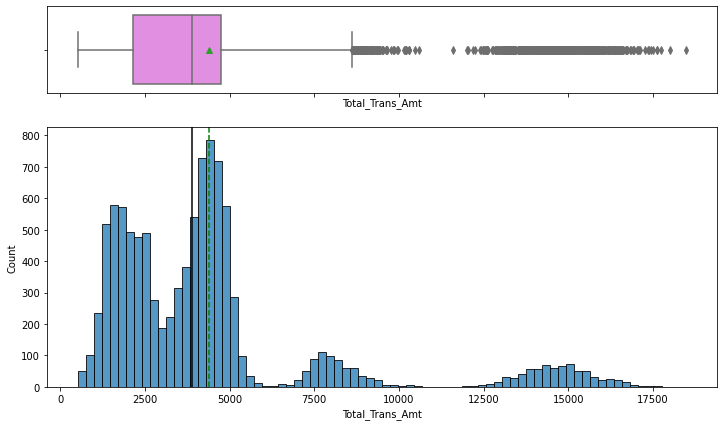

In [ ]:
#Histogram/Boxplot for Total_Trans_Amt analysis
histogram_boxplot(data, "Total_Trans_Amt")

In [ ]:
#Mean of Total_Trans_Amt to buy
data.Total_Trans_Amt.mean()

4404.086303939963

In [ ]:
#Median of Total_Trans_Amt to buy
data.Total_Trans_Amt.median()

3899.0

**Observations**

*   Mean for total trans amount is \$4,404.09
*   Median for total trans amount is \$3,899



In [ ]:
#Evaluate outliers of Total_Trans_Amt
tta = feature_outliers('Total_Trans_Amt')
tta.sort_values(by = 'Total_Trans_Amt', ascending = False)
tta

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned
8591,Existing Customer,50,M,3,High School,Single,$80K - $120K,Blue,39,3,...,0.921,8693,91,0.569,0.104,45-54,30-39,"$20,000-29,000","$2,000-2,499","$10,000-19,000"
8650,Existing Customer,43,F,2,College,Married,Less than $40K,Blue,37,3,...,0.845,8947,93,0.576,0.249,35-44,30-39,"$1,000-9,999","$1,000-1,499","$0-9,999"
8670,Existing Customer,39,F,4,Doctorate,Married,Less than $40K,Blue,27,2,...,0.897,8854,92,0.643,0.154,35-44,20-29,"$1,000-9,999","$1,000-1,499","$0-9,999"
8708,Existing Customer,51,F,2,NaN,Married,$40K - $60K,Blue,36,2,...,0.896,8796,94,0.593,0.069,45-54,30-39,"$10,000-19,000","$1,000-1,499","$10,000-19,000"
8734,Existing Customer,45,M,5,NaN,Married,$60K - $80K,Blue,38,1,...,0.840,8778,85,0.604,0.336,35-44,30-39,"$1,000-9,999","$2,000-2,499","$0-9,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,...,0.570,14596,120,0.791,0.164,55-64,40-49,"$1,000-9,999",$500-999,"$0-9,999"
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,0.703,15476,117,0.857,0.462,45-54,30-39,"$1,000-9,999","$1,500-1,900","$0-9,999"
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,...,0.804,8764,69,0.683,0.511,35-44,20-29,"$1,000-9,999","$2,000-2,499","$0-9,999"
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,0.819,10291,60,0.818,0.000,35-44,30-39,"$1,000-9,999",NaN,"$0-9,999"


**Observations**

There are 896 outliers for this feature

**Total Trans Ct**

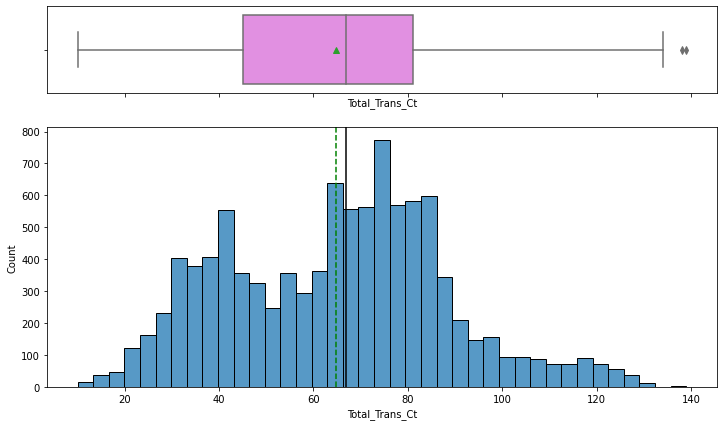

In [ ]:
#Histogram/Boxplot for Total_Trans_Ct analysis
histogram_boxplot(data, "Total_Trans_Ct")

In [ ]:
#Mean of Total_Trans_Ct 
data.Total_Trans_Ct.mean()

64.85869457884863

In [ ]:
#Median of Total_Trans_Ct 
data.Total_Trans_Ct.median()

67.0

In [ ]:
#Mode of Total_Trans_Ct 
data.Total_Trans_Ct.mode()

0    81
dtype: int64

**Observations**

*   The mean total trans count is 64.86
*   The median total trans count is 67
*   The mode total trans count is 81



In [ ]:
#Evaluate outliers of Total_Trans_Ct
ttct = feature_outliers('Total_Trans_Ct')
ttct.sort_values(by = 'Total_Trans_Ct', ascending = False)
ttct

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned
9324,Existing Customer,41,M,3,NaN,Married,$120K +,Blue,33,2,...,0.724,13085,139,0.675,0.018,35-44,30-39,"$30,000-39,000",$500-999,"$30,000-39,000"
9586,Existing Customer,56,F,1,High School,Married,Less than $40K,Blue,49,1,...,0.800,13939,138,0.792,0.143,55-64,40-49,"$10,000-19,000","$2,500+","$10,000-19,000"


**Observations**

*   There are 2 outliers for this feature



**Total_Ct_Chng_Q4_Q1**

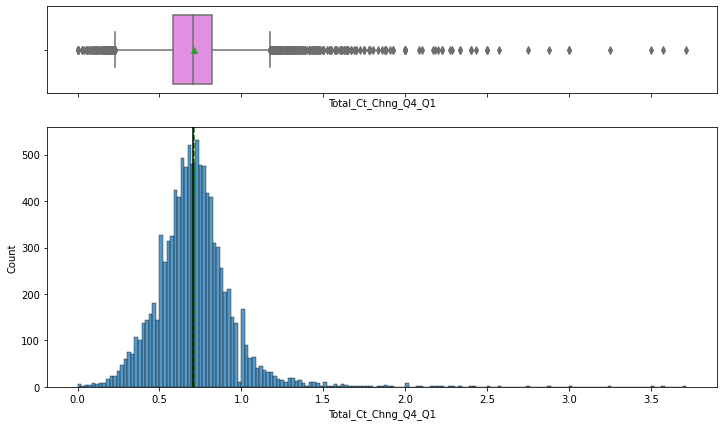

In [ ]:
#Histogram/Boxplot for Total_Ct_Chng_Q4_Q1 analysis
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

In [ ]:
#Mean of Total_Ct_Chng_Q4_Q1 
data.Total_Ct_Chng_Q4_Q1.mean()

0.7122223758269972

In [ ]:
#Median of Total_Ct_Chng_Q4_Q1 
data.Total_Ct_Chng_Q4_Q1.median()

0.702

In [ ]:
#Mode of Total_Ct_Chng_Q4_Q1 
data.Total_Ct_Chng_Q4_Q1.mode()

0    0.667
dtype: float64

**Observations**

*   The mean Total_Ct_Chng_Q4_Q1 is 0.71
*   The median Total_Ct_Chng_Q4_Q1 is 0.70
*   The mode Total_Ct_Chng_Q4_Q1 is 0.67

In [ ]:
#Evaluate outliers of Total_Ct_Chng_Q4_Q1
tctchgq4q1 = feature_outliers('Total_Ct_Chng_Q4_Q1')
tctchgq4q1.sort_values(by = 'Total_Ct_Chng_Q4_Q1', ascending = False)
tctchgq4q1

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,1.335,1144,42,1.625,0.061,35-44,30-39,"$10,000-19,000",$500-999,"$10,000-19,000"
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,1.541,1291,33,3.714,0.105,45-54,40-49,"$1,000-9,999",$500-999,"$0-9,999"
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,2.594,1887,20,2.333,0.000,45-54,30-39,"$1,000-9,999",NaN,"$0-9,999"
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,...,1.405,1171,20,2.333,0.760,35-44,30-39,"$1,000-9,999","$2,500+","$0-9,999"
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,2.175,816,28,2.500,0.000,35-44,20-29,"$1,000-9,999",NaN,"$0-9,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9388,Attrited Customer,40,F,2,College,Single,Less than $40K,Blue,36,4,...,0.311,5843,60,0.176,0.000,35-44,30-39,"$1,000-9,999",NaN,"$0-9,999"
9672,Attrited Customer,60,M,1,High School,Single,Less than $40K,Blue,50,4,...,0.978,8970,78,1.294,0.000,55-64,40-49,"$1,000-9,999",NaN,"$0-9,999"
9856,Attrited Customer,44,M,4,Uneducated,Married,$60K - $80K,Silver,37,1,...,0.770,8765,84,1.211,0.000,35-44,30-39,"$20,000-29,000",NaN,"$20,000-29,000"
9917,Attrited Customer,40,M,2,NaN,Single,$60K - $80K,Blue,20,4,...,0.878,8672,64,1.207,0.000,35-44,10-19,"$1,000-9,999",NaN,"$0-9,999"


**Observations**

There are 394 outliers for this feature

**Avg Utilization Ratio**

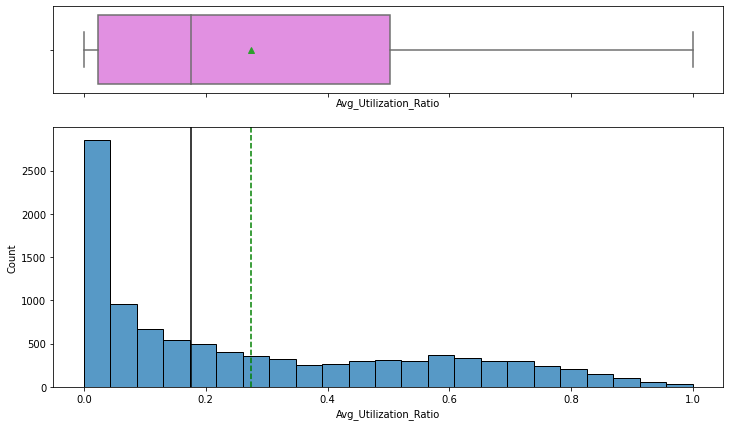

In [ ]:
#Histogram/Boxplot for Avg_Utilization_Ratio analysis
histogram_boxplot(data, "Avg_Utilization_Ratio")

In [ ]:
#Mean of Avg_Utilization_Ratio 
data.Avg_Utilization_Ratio.mean()

0.2748935518909845

In [ ]:
#Median of Avg_Utilization_Ratio 
data.Avg_Utilization_Ratio.median()

0.176

In [ ]:
#Mode of Avg_Utilization_Ratio 
data.Avg_Utilization_Ratio.mode()

0    0.0
dtype: float64

**Observations**

*   The mean Avg_Utilization_Ratio is 0.28
*   The median Avg_Utilization_Ratio is 0.18
*   The mode Avg_Utilization_Ratio is 0.0

In [ ]:
#Evaluate outliers of Avg_Utilization_Ratio
aur = feature_outliers('Avg_Utilization_Ratio')
aur.sort_values(by = 'Avg_Utilization_Ratio', ascending = False)
aur

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Binned,Months_Binned,Credit_Binned,RevBal_Binned,Avg_Binned


**Observations**

There are no outliers in the feature

**Attrition_Flag**

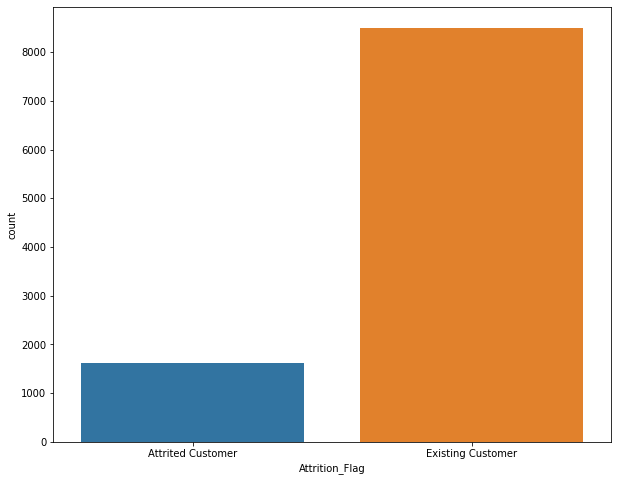

In [ ]:
#Countplot of the Attrition_Flag  column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Attrition_Flag', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

The majority of customers in the dataset are existing customers.

**Gender**

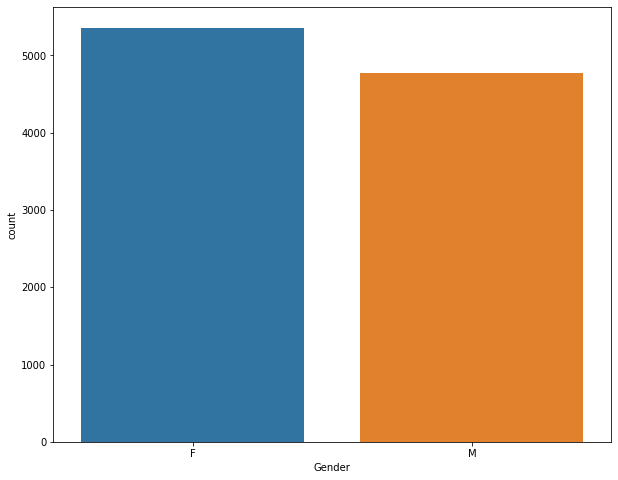

In [ ]:
#Countplot of the gender column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Gender', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

There are roughly 1,000 more females than males in this dataset.

**Dependent Count**

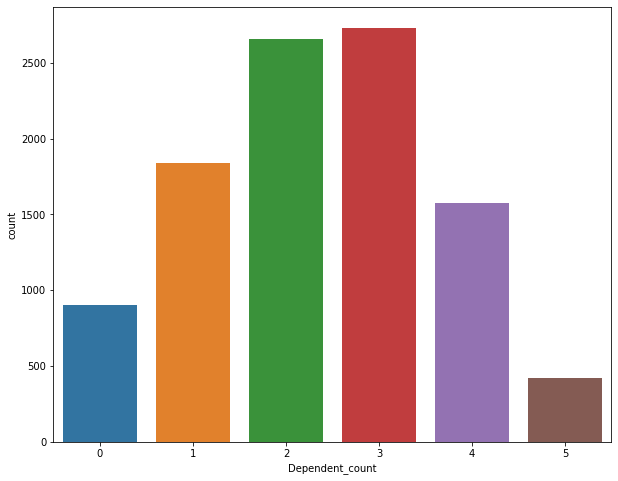

In [ ]:
#Countplot of the gender column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Dependent_count', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

*   Customers having 2-3 dependents are the highest in this dataset
*   Customers with 5 dependents are the least in this dataset



**Education Level**

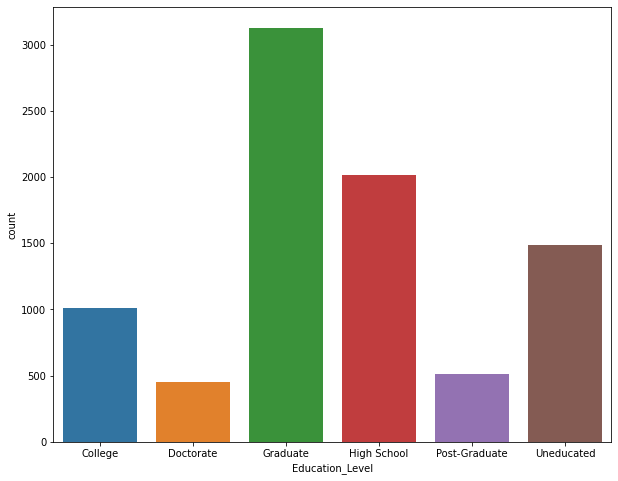

In [ ]:
#Countplot of the Education_Level column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Education_Level', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

Graduate and high school level educations are the most represented in the dataset. Post graduate and doctorate customers make up the least.

**Marital Status**

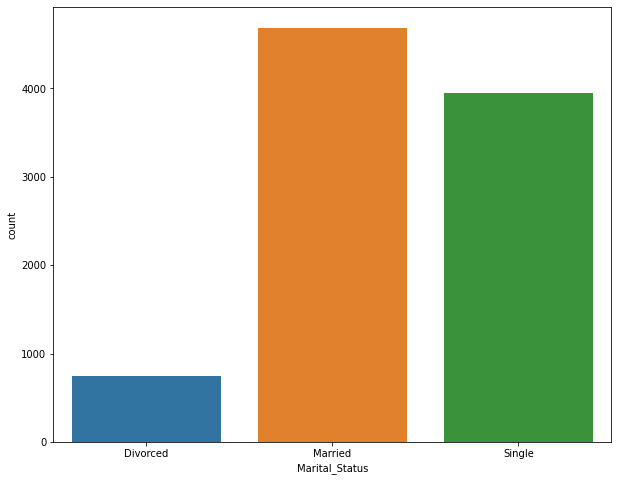

In [ ]:
#Countplot of the Marital_Status column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Marital_Status', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

*   Married customers make up the most represented in the dataset
*   Single customers are the second highest represented in the marital status feature
*  Divorced customers in the dataset are under 1,000



**Income Category**

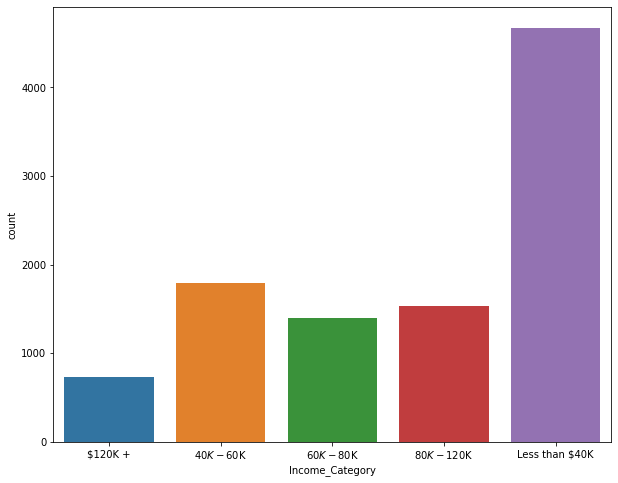

In [ ]:
#Countplot of the Income_Category column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Income_Category', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

The majority of customers represented in this dataset earn less than $40k

**Card Category**

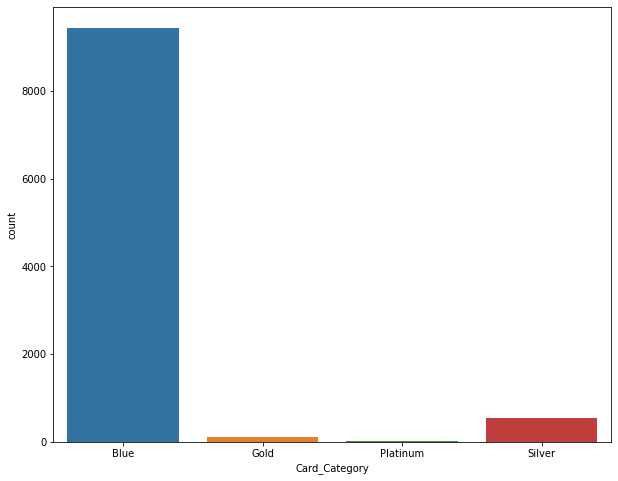

In [ ]:
#Countplot of the Card_Category column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Card_Category', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

The Blue card makes up the vast majorty of card holders where Platinum repesents the least.

**Total Relationship Count**

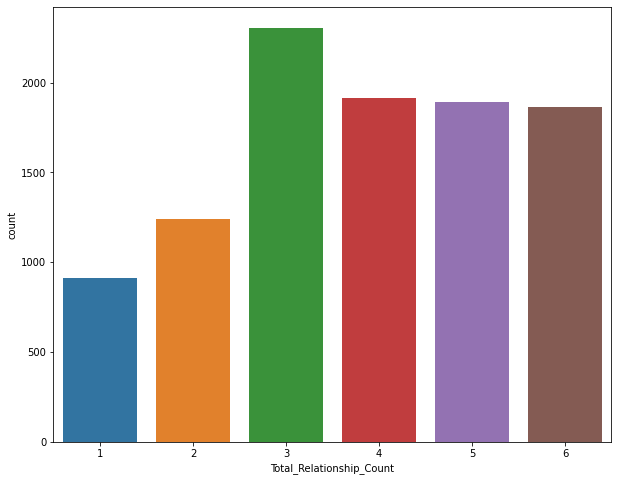

In [ ]:
#Countplot of the Total_Relationship_Count column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Total_Relationship_Count', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

The majority of total relationship count is 3. 4-6 representation is almost identitcal.

**Months_Inactive_12_mon**

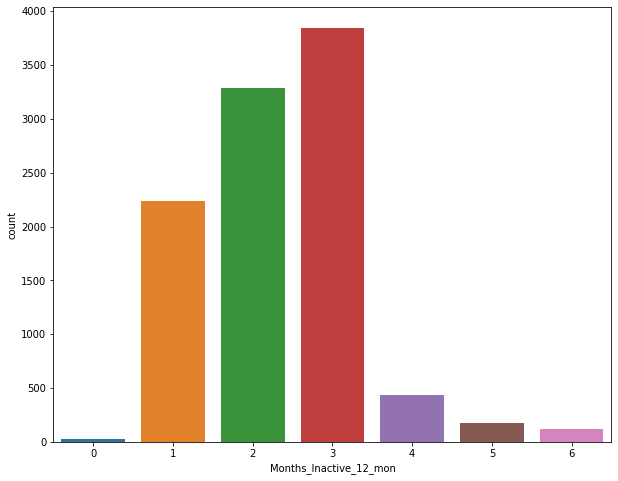

In [ ]:
#Countplot of the Months_Inactive_12_mon column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Months_Inactive_12_mon', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

2-3 are the most represented for months_inactive_12 months where 0 is virtually non-existent.

**Contacts_Count_12_mon**

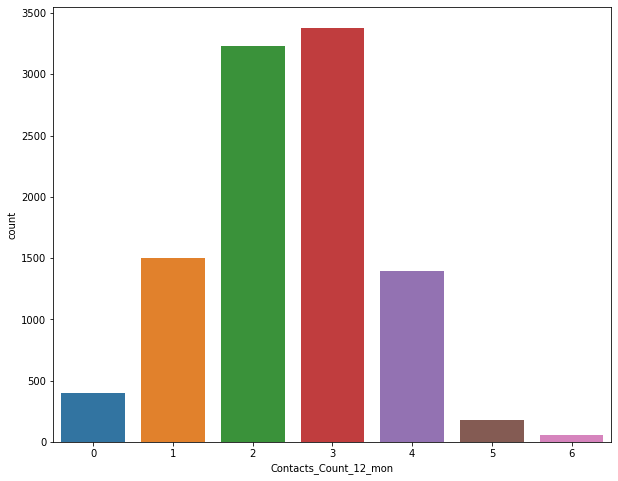

In [ ]:
#Countplot of the Contacts_Count_12_mon column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Contacts_Count_12_mon', data = data)
ax.set_xticklabels(ax.get_xticklabels());

**Observations**

The highest representation in the contacts_count_12_mon feature is 2-3. 1 and 4 are almost identical.

## **Bivariate Analysis**

In [ ]:
#Function for Bivariate analysis (code taken from class notes)
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Attrition Flag by Age Binned**

Attrition_Flag  Attrited Customer  Existing Customer    All
Age_Binned                                                 
All                          1627               8500  10127
45-54                         688               3447   4135
35-44                         606               3136   3742
55-64                         209               1112   1321
25-34                         122                797    919
65 and older                    2                  8     10
------------------------------------------------------------------------------------------------------------------------


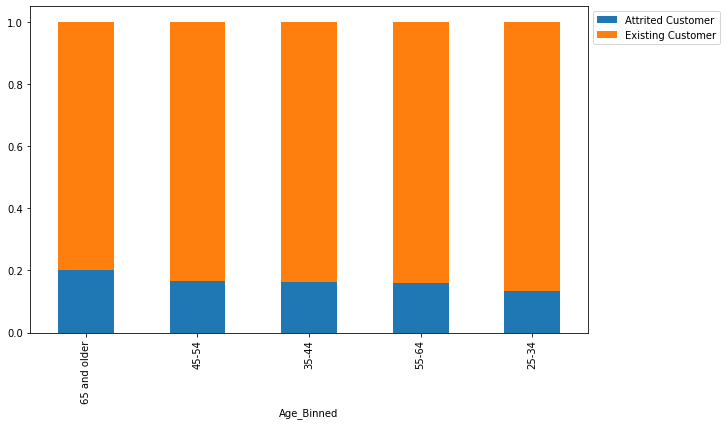

In [ ]:
#Barplot of Attrition_Flag by age_binned
stacked_barplot(data, "Age_Binned", "Attrition_Flag")

**Observations**

65 and older category for aged binnned contain the most attrited customers where 25-34 are the least.

**Attrition Flag by Gender**

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


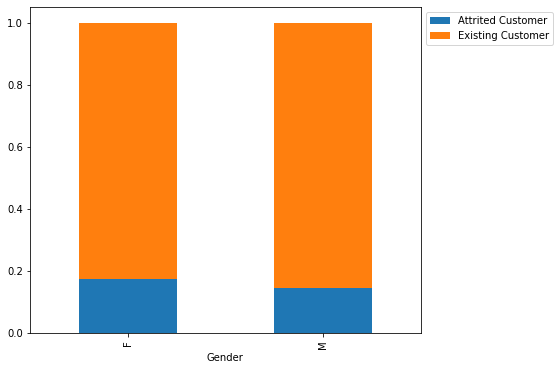

In [ ]:
#Barplot of Attrition_Flag by Gender
stacked_barplot(data, "Gender", "Attrition_Flag")

**Observations**

There are slightly more females than males for attrited customers represented in the dataset.



**Attrition Flag by Dependent Count**

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


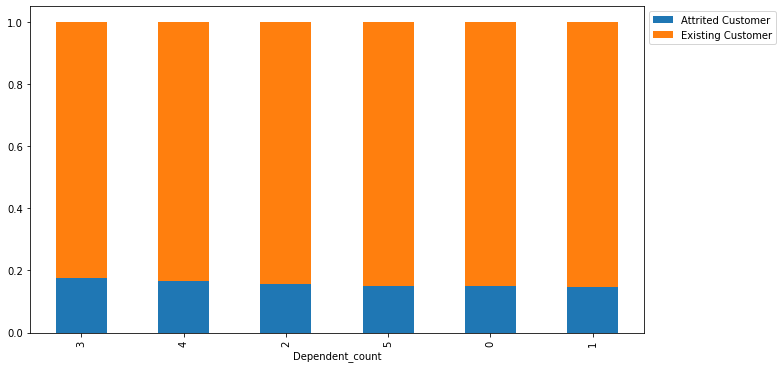

In [ ]:
#Barplot of Attrition_Flag by Dependent Count
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

**Observations**

There is almost no noticable difference in attrited customers based on dependent count.

**Attrition Flag by Education_Level**

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


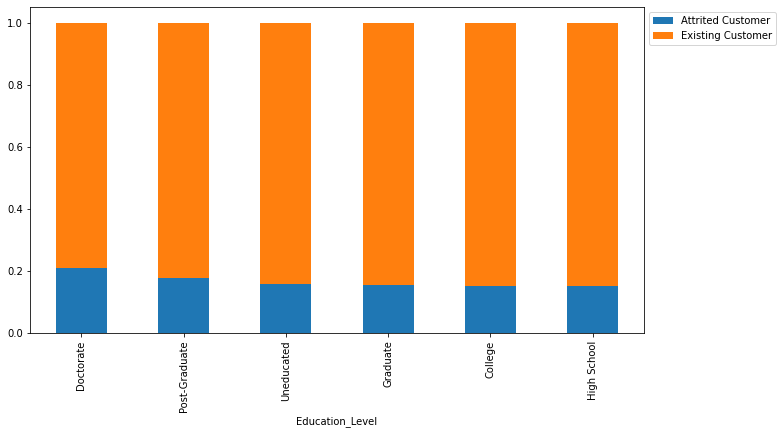

In [ ]:
#Barplot of Attrition_Flag by Education_Level
stacked_barplot(data, "Education_Level", "Attrition_Flag")

**Observations**

Higher education shows more attrited customers - specifically, doctorate and post graduate level customers.

**Attrition Flag by Marital_Status**

Marital_Status     Divorced  Married  Single   All
Attrition_Flag                                    
All                     748     4687    3943  9378
Existing Customer       627     3978    3275  7880
Attrited Customer       121      709     668  1498
------------------------------------------------------------------------------------------------------------------------


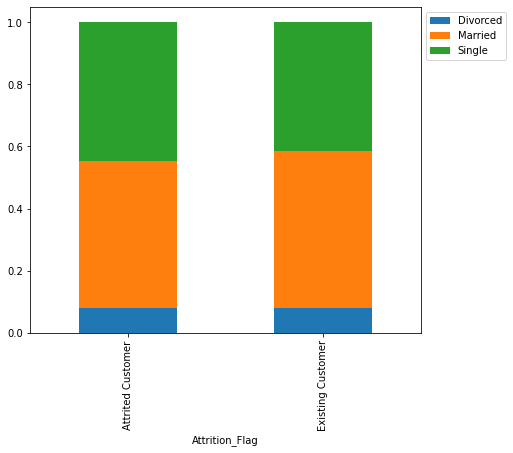

In [ ]:
#Barplot of Attrition_Flag by Maritial_Status
stacked_barplot(data,  "Attrition_Flag", "Marital_Status")

**Observations**

Single people represent more attrited customers as compared to the existing customer base.

**Attrition Flag by Income_Category**

Income_Category    $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                       
All                    727         1790         1402          1535   
Existing Customer      601         1519         1213          1293   
Attrited Customer      126          271          189           242   

Income_Category    Less than $40K    All  
Attrition_Flag                            
All                          4673  10127  
Existing Customer            3874   8500  
Attrited Customer             799   1627  
------------------------------------------------------------------------------------------------------------------------


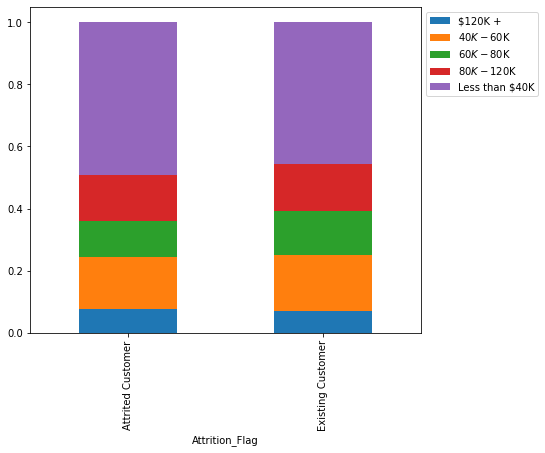

In [ ]:
#Barplot of Attrition_Flag by Income_Category
stacked_barplot(data, "Attrition_Flag", "Income_Category")

**Observations**

For both existing and attrited customers, <$40K appears to the most represented customer segment for income category.

**Attrition Flag by Card_Category**

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


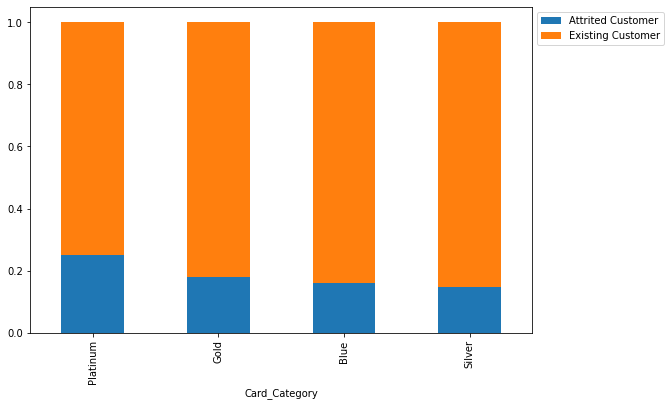

In [ ]:
#Barplot of Attrition_Flag by Card_Category
stacked_barplot(data, "Card_Category", "Attrition_Flag")

**Observations**

Platinum card holders account for the most attrited customer base.

**Attrition Flag by Months_Binned**

Months_Binned      10-19  20-29  30-39  40-49  50 and over    All
Attrition_Flag                                                   
All                  383   1837   5424   2065          418  10127
Existing Customer    327   1554   4538   1725          356   8500
Attrited Customer     56    283    886    340           62   1627
------------------------------------------------------------------------------------------------------------------------


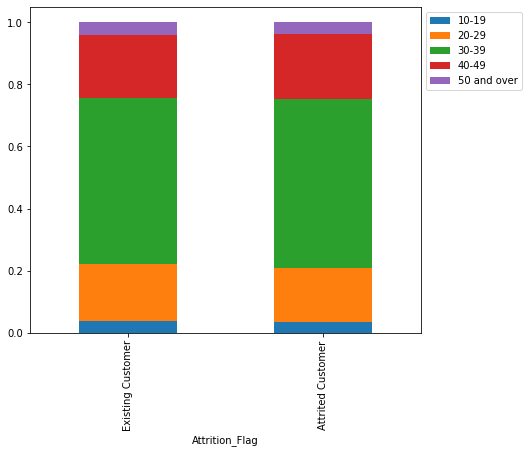

In [ ]:
#Barplot of Attrition_Flag by Card_Category
stacked_barplot(data, "Attrition_Flag",  "Months_Binned")

**Observations**

There is minimal difference bewteen attrited customers and existing customers in terms of the months

**Attrition Flag by Total_Relationship_Count**

Total_Relationship_Count    1     2     3     4     5     6    All
Attrition_Flag                                                    
All                       910  1243  2305  1912  1891  1866  10127
Existing Customer         677   897  1905  1687  1664  1670   8500
Attrited Customer         233   346   400   225   227   196   1627
------------------------------------------------------------------------------------------------------------------------


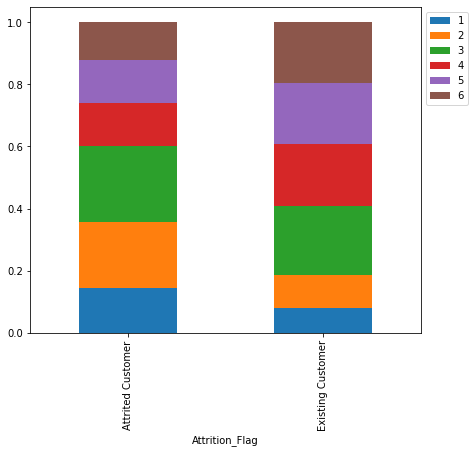

In [ ]:
#Barplot of Attrition_Flag by Total_Relationship_Count
stacked_barplot(data, "Attrition_Flag",  "Total_Relationship_Count")

**Observations**

*   There are more 1's and 2's for relationship count in the attrited customer feature than there are in the existing customer count
*   There are more 3-6's for relationship count in the existing customer feature than there are in the attrited customer count



**Attrition Flag by Months_Inactive_12_mon**



Months_Inactive_12_mon   0     1     2     3    4    5    6    All
Attrition_Flag                                                    
All                     29  2233  3282  3846  435  178  124  10127
Attrited Customer       15   100   505   826  130   32   19   1627
Existing Customer       14  2133  2777  3020  305  146  105   8500
------------------------------------------------------------------------------------------------------------------------


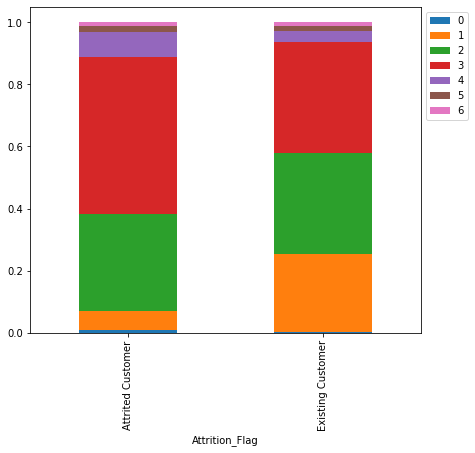

In [ ]:
#Barplot of Attrition_Flag by Months_Inactive_12_mon
stacked_barplot(data, "Attrition_Flag",  "Months_Inactive_12_mon")

**Observations**

There is a higher number of attrited customers with 3 months of inactivity as compared to the existing customers, but there are more customers with 1 month of inactivity in the existing customer group as compared to the attrited.

**Attrition Flag by Contacts_Count_12_mon**

Contacts_Count_12_mon    0     1     2     3     4    5   6    All
Attrition_Flag                                                    
Attrited Customer        7   108   403   681   315   59  54   1627
All                    399  1499  3227  3380  1392  176  54  10127
Existing Customer      392  1391  2824  2699  1077  117   0   8500
------------------------------------------------------------------------------------------------------------------------


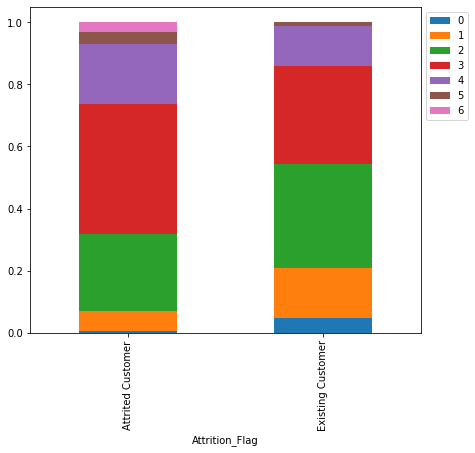

In [ ]:
#Barplot of Attrition_Flag by Contacts_Count_12_mon
stacked_barplot(data, "Attrition_Flag",  "Contacts_Count_12_mon")

**Observations**

There are more 0, 1, 2 existing customers for the Contacts_Count_12_mon feature, but more 3, 4, 5, and 6 for attrited.

**Attrition Flag by Credit_Binned**

Credit_Binned      $1,000-9,999  $10,000-19,000  $20,000-29,000  \
Attrition_Flag                                                    
All                        7373            1490             597   
Existing Customer          6145            1275             521   
Attrited Customer          1228             215              76   

Credit_Binned      $30,000-39,000    All  
Attrition_Flag                            
All                           667  10127  
Existing Customer             559   8500  
Attrited Customer             108   1627  
------------------------------------------------------------------------------------------------------------------------


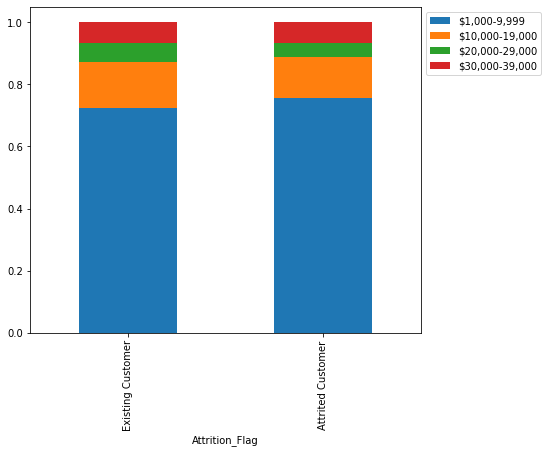

In [ ]:
#Barplot of Attrition_Flag by Credit_Binned
stacked_barplot(data, "Attrition_Flag",  "Credit_Binned")

**Observations**

Slightly higher number of existing customers between \$10,000-$29,000 for credit as compared to attrited customers.



**Attrition Flag by RevBal_Binned**

RevBal_Binned      $0-499  $500-999  $1,000-1,499  $1,500-1,900  $2,000-2,499  \
Attrition_Flag                                                                  
All                   126      1317          2258          2291          1136   
Attrited Customer     106       163           102           109            92   
Existing Customer      20      1154          2156          2182          1044   

RevBal_Binned      $2,500+   All  
Attrition_Flag                    
All                    529  7657  
Attrited Customer      162   734  
Existing Customer      367  6923  
------------------------------------------------------------------------------------------------------------------------


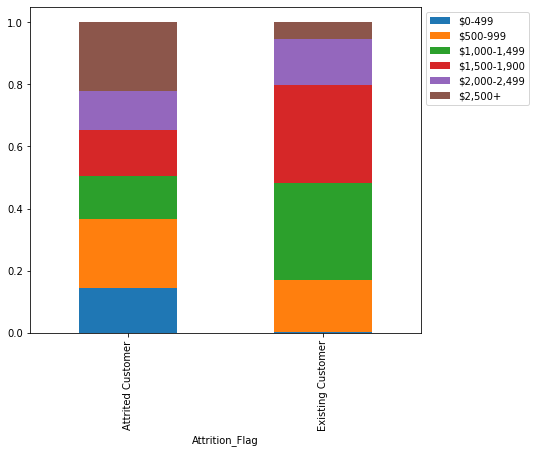

In [ ]:
#Barplot of Attrition_Flag by Credit_Binned
stacked_barplot(data, "Attrition_Flag",  "RevBal_Binned")

**Observations**

There are more ranges in the attrited customer base for revolving balance as compared to the existing customers.


**Attrition Flag by Avg_Binned**

Avg_Binned         $0-9,999  $10,000-19,000  $20,000-29,000  $30,000-39,000  \
Attrition_Flag                                                                
All                    7631            1329             544             623   
Existing Customer      6382            1131             471             516   
Attrited Customer      1249             198              73             107   

Avg_Binned           All  
Attrition_Flag            
All                10127  
Existing Customer   8500  
Attrited Customer   1627  
------------------------------------------------------------------------------------------------------------------------


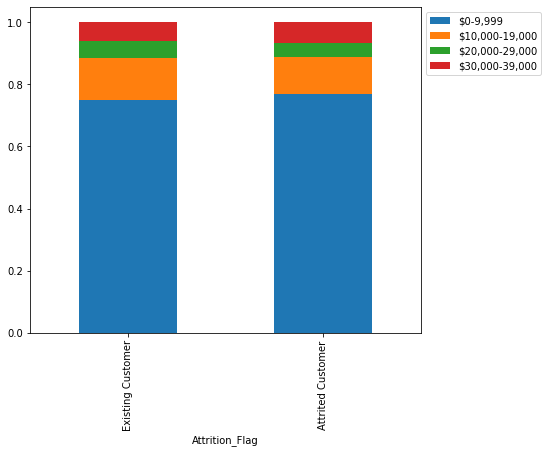

In [ ]:
#Barplot of Attrition_Flag by Avg_Binned
stacked_barplot(data, "Attrition_Flag",  "Avg_Binned")

**Observations**

There are slightly more existing customers in the $10,000-29,000 range than in the attrited group.


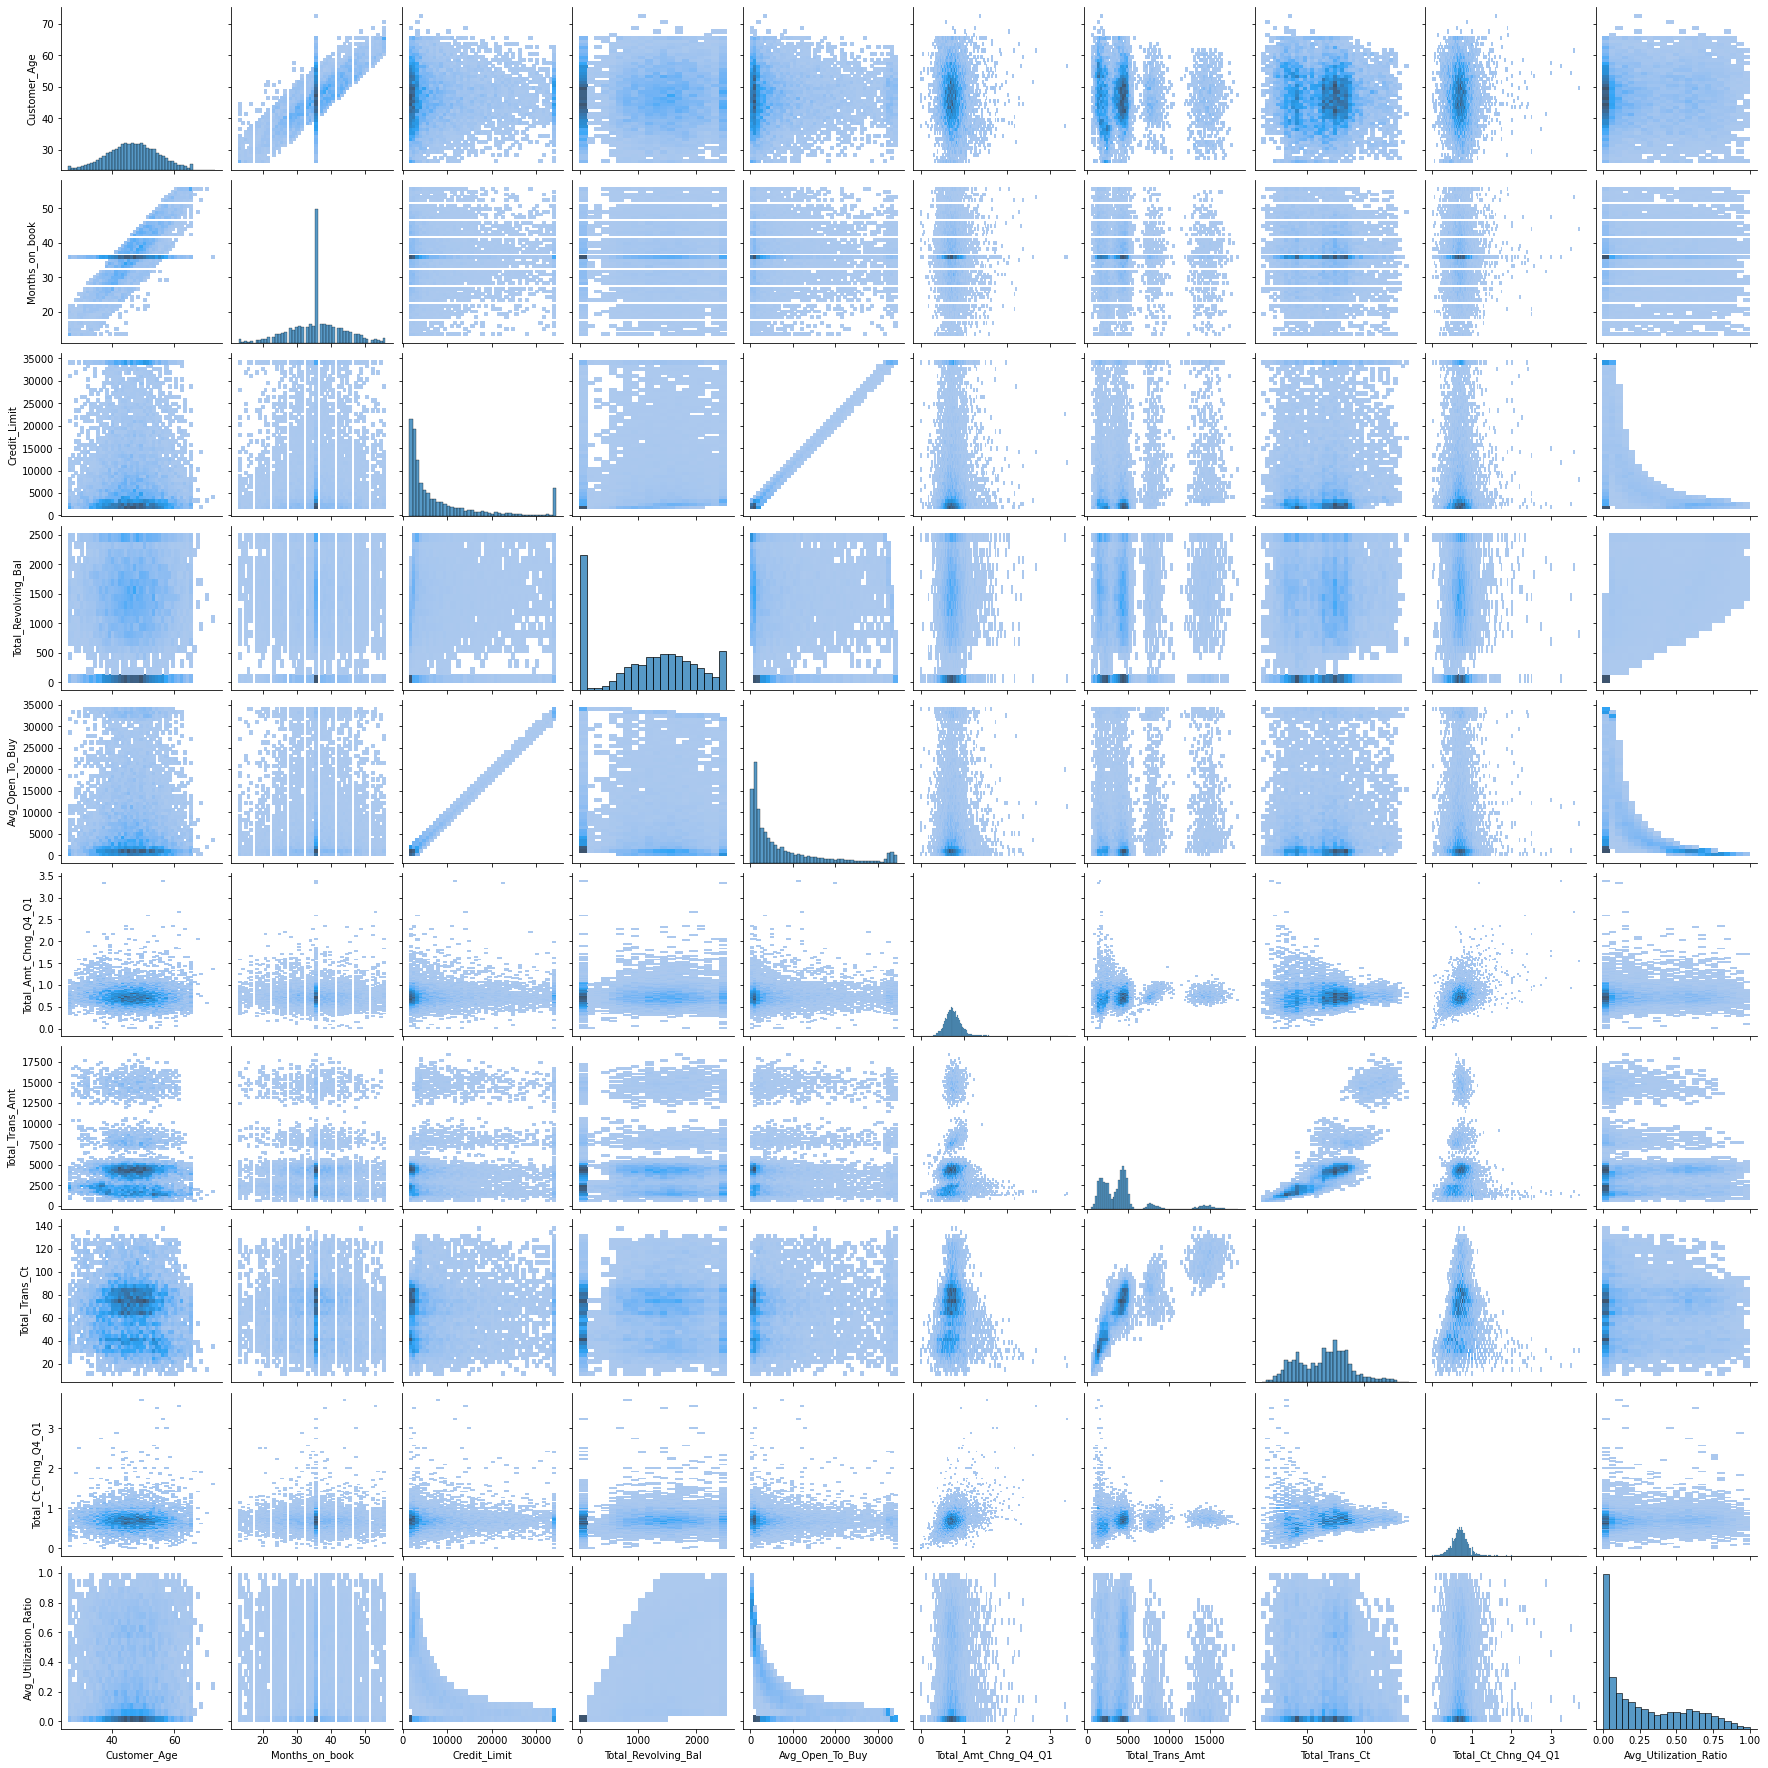

In [ ]:
#Pairplot of all the numeric features
sns.pairplot(data, kind = 'hist');

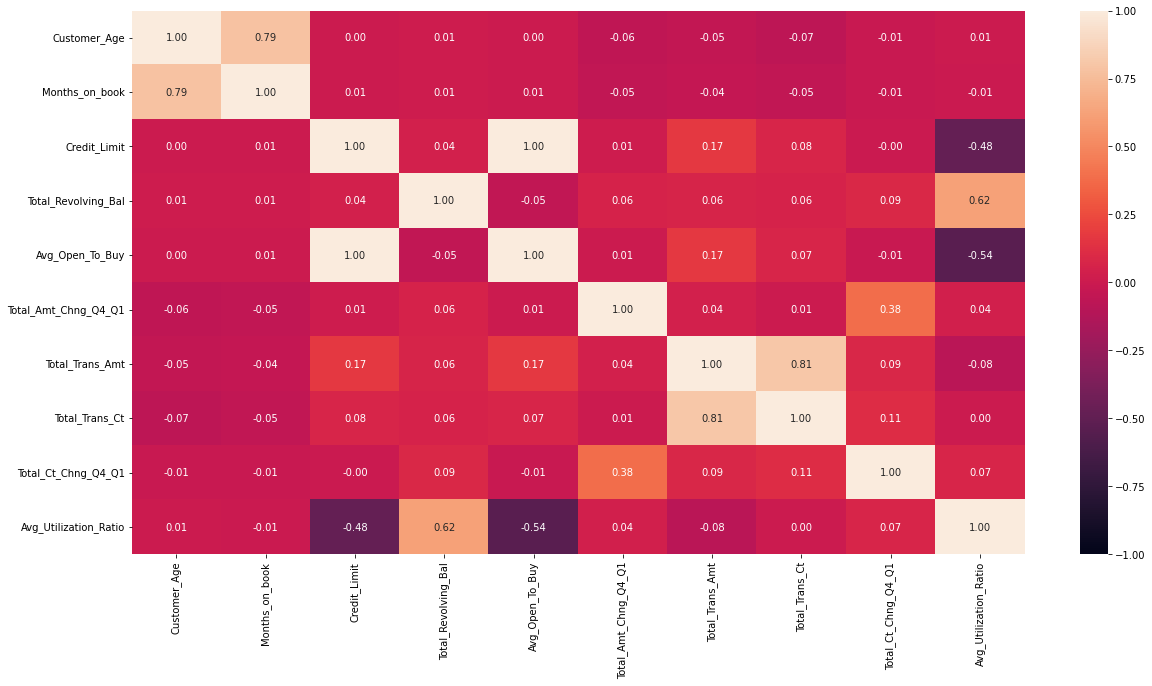

In [ ]:
# heatmap for correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

**Observations**

There is a 100% correlation between Credit Limit and Average Open to Buy. We will drop Average Open to Buy.

**Data Preparation and Missing Value Treatments**

In [ ]:
#Drop the binned columns
data.drop(columns = ['Months_Binned', 'Credit_Binned', 'RevBal_Binned', 'Avg_Binned', 'Age_Binned'], inplace= True)

In [ ]:
#Validate the binned columns have been dropped
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
#Evaluate missing data
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

**Observations**

There are 1,519 missing values for the education level feature and 749 missing values for marital status. We will impute them in a bit using the most frequent stategy with the simple imputer.

In [ ]:
#First we will encode the target variable
data['Attrition_Flag'] = data['Attrition_Flag'].replace(to_replace = {"Attrited Customer": 1, "Existing Customer": 0})

In [ ]:
#Value counts of target variable
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
#Isolating the target variable and create the independent varibale for model building
X = data.drop(columns = ["Attrition_Flag", 'Avg_Open_To_Buy'])
y = data["Attrition_Flag"]

In [ ]:
#Setting the dummy variables (data still missing for education and maritial - we will impute this next)
X = pd.get_dummies(data = data, columns=["Gender","Education_Level", "Marital_Status", "Income_Category",
                                         "Card_Category",], drop_first=True,)

In [ ]:
#Checking the values in X
X

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,1,0,0,1,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,1,0,0,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,0,1,0,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,0,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,0,1,1,0,0,0,0,0,0
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,0,0,1,0,0,0,0,0,0
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,...,0,1,0,0,0,0,1,0,0,0
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Drop the target variable from X
X = X.drop(columns = "Attrition_Flag")

In [ ]:
#Confirm target variable has been dropped from X
X

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,1,0,0,1,0,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,1,0,0,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,1,0,0,0,1,0,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,0,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0,0,1,1,0,0,0,0,0,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0,0,0,1,0,0,0,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,1,0,0,0,0,1,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Split the data into training, validation, and testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1,stratify = y_temp) 
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


Here, we will impute the missing values for the Education and Marital Status columns using the strategy of most frequent as this makes the most sense given the datatypes.

In [ ]:
#Imputing the missing values for Education and Marital Status
simple_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
impute = simple_imputer.fit(X_train)

#Imputing the values on train, validation set and test set
X_train = impute.transform(X_train)
X_val = simple_imputer.transform(X_val)
X_test = simple_imputer.transform(X_test)

In [ ]:
#Validate that all the missing data in the X_train dataset has been addressed
np.nan in X_train

False

In [ ]:
#Validate that all the missing data in the X_val dataset has been addressed
np.nan in X_val

False

In [ ]:
#Validate that all the missing data in the X_test dataset has been addressed
np.nan in X_test

False

Confirmed all missing data has been addressed in the training, validation, and testing datasets.

In [ ]:
#Function to create confusion matrix for models
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

**Building the Models**

For efficiency, we will create an empty list to build six models using Logistic Regression, Decision Tree, Random Forest, Gradient Boost, AdaBoost, and Bagging and compare the recall scores for testing and validation datasets.

In [ ]:
# Empty list to store all the models
list_of_models = []  

# Appending models into the list
list_of_models.append(("Logistic Regression",LogisticRegression(random_state=1, class_weight={0: 15, 1: 85}),))
list_of_models.append(("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight={0: 15, 1: 85}),))
list_of_models.append(("Random Forest", RandomForestClassifier(random_state=1, class_weight={0: 15, 1: 85}),))
list_of_models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
list_of_models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
list_of_models.append(("Bagging", BaggingClassifier(random_state=1)))

#List to store model's CV scores
model_scores = []
#List to store name of the models  
model_names = []  

We will create a for loop to iterate through each model and extract the recall score for all six models on the training dataset.

In [ ]:
#Create a for loop to output all the models cross validation scores by mean on training data
print("CV Scores:")
print("-" * 50)
for name, model in list_of_models:
    #Use recall as scoring metric
    scoring = "recall"
    # Set number of splits equal to 5
    kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
    cv_result = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = scoring, cv = kfold)
    model_scores.append(cv_result)
    model_names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

CV Scores:
--------------------------------------------------
Logistic Regression: 0.814515960230246
Decision Tree: 0.746902145473574
Random Forest: 0.706938775510204
Gradient Boost: 0.812464678178964
Adaboost: 0.813469387755102
Bagging: 0.7848142333856619


**Observations**

*   Logistic Regression had the best recall score at 81.5%
* AdaBoost scored the second best recall score at 81.3%
*   Gradient Boost scored the third best recall score at 81.2%
*   Gradient Boost scored the third best recall score at 81.2%
*   Bagging scored the fourth best recall score at 78.9%
*   Decision tree scored the fifth best recall score at 74.7%
*   Random tree classifier scored the lowest recall score at 70.7%


In [ ]:
#Create a for loop to output all the model scores for the validation set
print("Validation Scores:")
print("-" * 50)
for name, model in list_of_models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

Validation Scores:
--------------------------------------------------
Logistic Regression: 0.8098159509202454
Decision Tree: 0.803680981595092
Random Forest: 0.7423312883435583
Gradient Boost: 0.8588957055214724
Adaboost: 0.8588957055214724
Bagging: 0.7975460122699386


**Observations**

*   Gradient Boost and AdaBoost had the best recall scores at 85.9%
*  Logistic Regression scored the second best recall score at 81%
*   Decision tree scored the third best recall score at 80.4%
*   Bagging scored the fourth best recall score at 79.8%
*   Random tree classifier scored the lowest recall score at 74.2%


**Oversampling**

Given the imbalance in the dataset, we will try to oversample using the Synthetic Minority Over Sampling Technique (SMOTE).

In [ ]:
#Print the number of Yes and No labels prior to over sampling
print("Before Over Sampling, number of 'Yes' labels are: {}".format(sum(y_train == 1)))
print("Before Over Sampling, number of 'No' labels are: {} \n".format(sum(y_train == 0)))

#Using Synthetic Minority Over Sampling Technique (SMOTE)
sm = SMOTE( sampling_strategy=1, k_neighbors=5, random_state=1)  
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

#Print the number of Yes and No labels post over sampling
print("After Over Sampling, number of 'Yes' labels are: {}".format(sum(y_train_over == 1)))
print("After Over Sampling, number of 'No' labels are: {} \n".format(sum(y_train_over == 0)))

#Print the shape of X_train and y_train post over sampling
print("After Over Sampling, the shape of train_X is : {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y is: {} \n".format(y_train_over.shape))

Before Over Sampling, number of 'Yes' labels are: 976
Before Over Sampling, number of 'No' labels are: 5099 

After Over Sampling, number of 'Yes' labels are: 5099
After Over Sampling, number of 'No' labels are: 5099 

After Over Sampling, the shape of train_X is : (10198, 29)
After OverSampling, the shape of train_y is: (10198,) 



**Logistic Regression (OverSampling)**

In [ ]:
#Training the basic logistic regression model with training set over sampling
lr_oversampled = LogisticRegression(random_state=1, class_weight={0: 15, 1: 85})
lr_oversampled.fit(X_train_over, y_train_over)

LogisticRegression(class_weight={0: 15, 1: 85}, random_state=1)

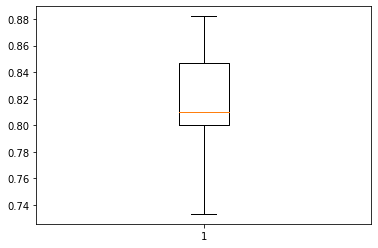

In [ ]:
#KFold and cross_val_score on Logistic Regression Model Over Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  
cv_result_bfr = cross_val_score(estimator = lr_oversampled, X= X_train, y= y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
lr_scores_over_train = model_performance_classification_sklearn(lr_oversampled, X_train, y_train)
print("Training performance:")
lr_scores_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.52214,0.980533,0.249154,0.397343


**Observations**

This scored a really high recall score but precision and accuracy can be improved.

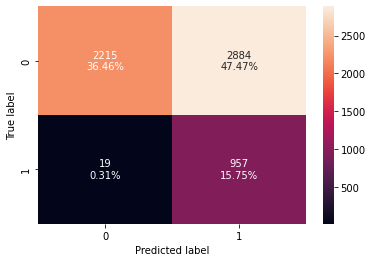

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(lr_oversampled, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 2,215

*  **True Positives (TP):** Correctly predicted 957

* **False Positives (FP):** Incorrectly predicted 2,884 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 19 (Type II error)

In [ ]:
#Calculating different metrics on validation set
lr_scores_over_val = model_performance_classification_sklearn(lr_oversampled, X_val, y_val)
print("Validation performance:")
lr_scores_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.521224,0.97546,0.248438,0.396015


**Observations**

Slightly lower recall, but very close to the training set. Precision and accuracy still very low.

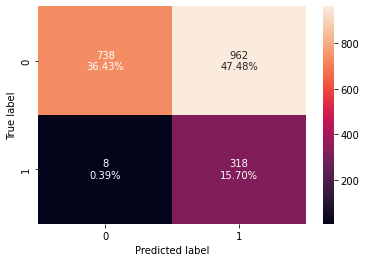

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(lr_oversampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 738

*  **True Positives (TP):** Correctly predicted 318

* **False Positives (FP):** Incorrectly predicted 962 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 8 (Type II error)

**Decision Tree (OverSampling)**

In [ ]:
#Training the basic decision tree model with training set
dt_oversampled = DecisionTreeClassifier(random_state=1, class_weight={0: 15, 1: 85})
dt_oversampled.fit(X_train_over, y_train_over)

DecisionTreeClassifier(class_weight={0: 15, 1: 85}, random_state=1)

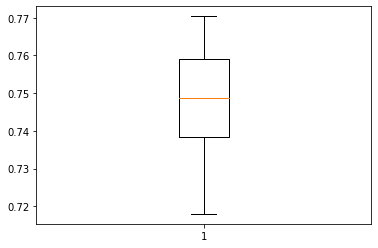

In [ ]:
#KFold and cross_val_score on Decision Tree Model Over Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = dt_oversampled, X= X_train, y= y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
dt_scores_over_train = model_performance_classification_sklearn(dt_oversampled, X_train, y_train)
print("Training performance:")
dt_scores_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Observations**

This model is overfit.

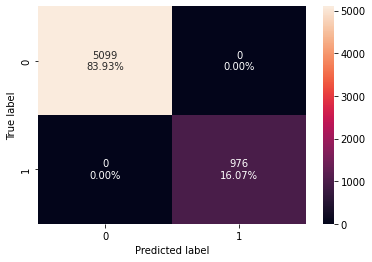

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(dt_oversampled, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 5,099

*  **True Positives (TP):** Correctly predicted 976

* **False Positives (FP):** Incorrectly predicted 0 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 0 (Type II error)

In [ ]:
#Calculating different metrics on validation set
dt_scores_over_val = model_performance_classification_sklearn(dt_oversampled, X_val, y_val)
print("Validation performance:")
dt_scores_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.909181,0.723926,0.715152,0.719512


**Observations**

The recall score is not great, but precision and accuracy greatly improved in the validation dataset as compared to the logistic regression model. This is still overfit.

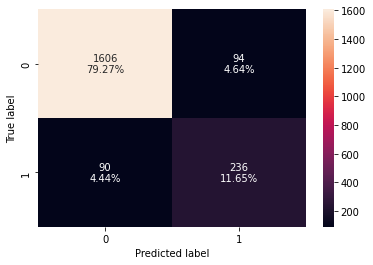

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(dt_oversampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,601

*  **True Positives (TP):** Correctly predicted 236

* **False Positives (FP):** Incorrectly predicted 94 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 90 (Type II error)

**Random Forest (OverSampling)**

In [ ]:
#Training the basic random forest model with training set
rf_oversampled = RandomForestClassifier(random_state=1, class_weight={0: 15, 1: 85})
rf_oversampled.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight={0: 15, 1: 85}, random_state=1)

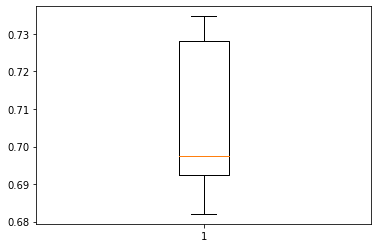

In [ ]:
#KFold and cross_val_score on Random Forest Model Over Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = rf_oversampled, X= X_train, y= y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
rf_scores_over_train = model_performance_classification_sklearn(rf_oversampled, X_train, y_train)
print("Training performance:")
rf_scores_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Observations**

This is also overfit.

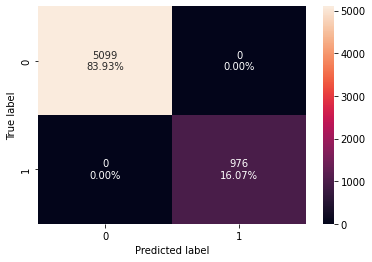

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_oversampled, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 5,099

*  **True Positives (TP):** Correctly predicted 976

* **False Positives (FP):** Incorrectly predicted 0 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 0 (Type II error)

In [ ]:
# Calculating different metrics on validation set
rf_scores_over_val = model_performance_classification_sklearn(rf_oversampled, X_val, y_val)
print("Validation performance:")
rf_scores_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.942744,0.748466,0.877698,0.807947


**Observations**

This model performed slightly better than the decision tree model in terms of recall and had a decennt accuracy and precision score, although this model is also overfit.

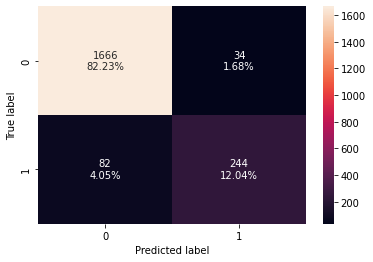

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_oversampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,666

*  **True Positives (TP):** Correctly predicted 244

* **False Positives (FP):** Incorrectly predicted 34 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 82 (Type II error)

**Gradient Boost (OverSampling)**

In [ ]:
#Training the basic gradient boost model with training set
gb_oversampled = GradientBoostingClassifier(random_state=1)
gb_oversampled.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

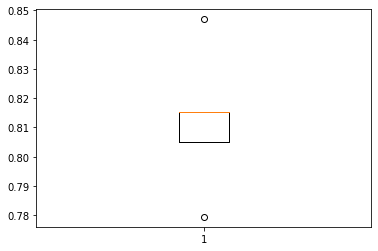

In [ ]:
#KFold and cross_val_score on Rgradient boost Model Over Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = gb_oversampled, X= X_train, y= y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
gb_scores_over_train = model_performance_classification_sklearn(gb_oversampled, X_train, y_train)
print("Training performance:")
gb_scores_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.969712,0.909836,0.902439,0.906122


**Observations**

This model had a very good recall score, accuracy score, and precision score. We will use this model in hypertuning later in the model build to see if we can gain a few more points.

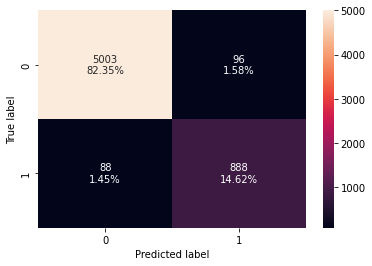

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_oversampled, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 5,003

*  **True Positives (TP):** Correctly predicted 888

* **False Positives (FP):** Incorrectly predicted 96 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 88 (Type II error)

In [ ]:
# Calculating different metrics on validation set
gb_scores_over_val = model_performance_classification_sklearn(gb_oversampled, X_val, y_val)
print("Validation performance:")
gb_scores_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.963475,0.886503,0.886503,0.886503


**Observations**

This model has performed extremely well in terms of recall, accuracy, and precision.

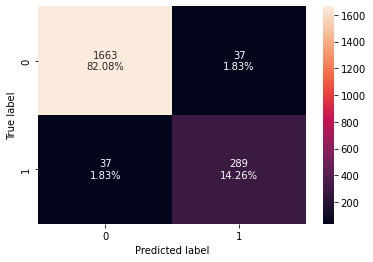

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_oversampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,663

*  **True Positives (TP):** Correctly predicted 289

* **False Positives (FP):** Incorrectly predicted 37 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 37 (Type II error)

**AdaBoost (OverSampling)**

In [ ]:
#Training the basic gradient boost model with training set
ada_oversampled = AdaBoostClassifier(random_state=1)
ada_oversampled.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

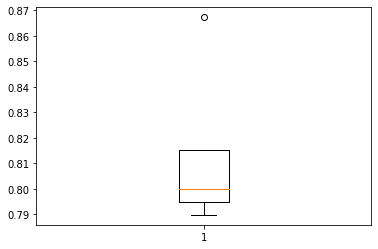

In [ ]:
#KFold and cross_val_score on AdaBoost Model Over Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = ada_oversampled, X= X_train, y= y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
ada_scores_over_train = model_performance_classification_sklearn(ada_oversampled, X_train, y_train)
print("Training performance:")
ada_scores_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.95177,0.873975,0.833822,0.853427


**Observations**

This model did not perform quite as good as the gradient boost, but still performed extremely well in terms of recall, accuracy, and precision. We will also use this model later for hypertuning to see if we can improve it even more.

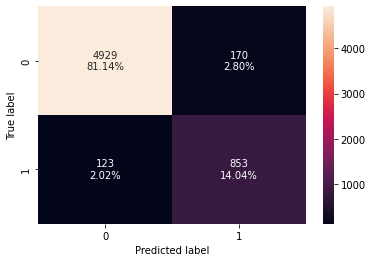

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_oversampled, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 4,929

*  **True Positives (TP):** Correctly predicted 853

* **False Positives (FP):** Incorrectly predicted 170 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 123 (Type II error)

In [ ]:
# Calculating different metrics on validation set
ada_scores_over_val = model_performance_classification_sklearn(ada_oversampled, X_val, y_val)
print("Validation performance:")
ada_scores_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.948667,0.880368,0.815341,0.846608


**Observations**

This model performed well in terms of recall, accuracy, and precision.


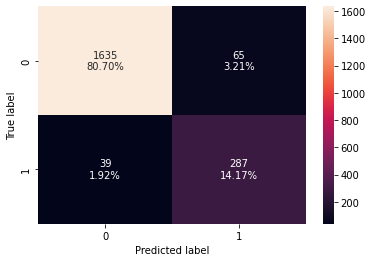

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_oversampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,635

*  **True Positives (TP):** Correctly predicted 287

* **False Positives (FP):** Incorrectly predicted 65 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 39 (Type II error)

**Bagging (OverSampling)**

In [ ]:
#Training the basic gradient boost model with training set
bagging_oversampled = BaggingClassifier(random_state=1)
bagging_oversampled.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

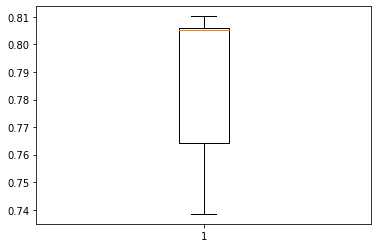

In [ ]:
#KFold and cross_val_score on Bagging Model Over Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = bagging_oversampled, X= X_train, y= y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
bagging_scores_over_train = model_performance_classification_sklearn(bagging_oversampled, X_train, y_train)
print("Training performance:")
bagging_scores_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.998354,0.993852,0.995893,0.994872


**Observations**

This model scored almost perfect on all metrics and may be slightly overfit. Nonetheless, we will also hypertune this model given its high performance.

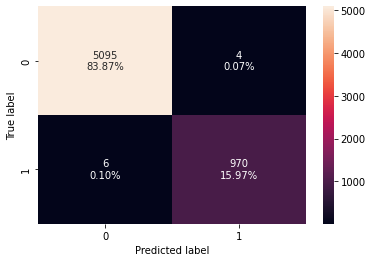

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_oversampled, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 5,095

*  **True Positives (TP):** Correctly predicted 970

* **False Positives (FP):** Incorrectly predicted 4 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 6 (Type II error)

In [ ]:
# Calculating different metrics on validation set
bagging_scores_over_val = model_performance_classification_sklearn(bagging_oversampled, X_val, y_val)
print("Validation performance:")
bagging_scores_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.948174,0.849693,0.831832,0.840668


**Observations**

This model had a decent recall score, but scored lower in terms of precision.

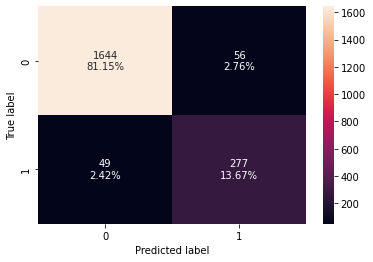

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_oversampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,644

*  **True Positives (TP):** Correctly predicted 277

* **False Positives (FP):** Incorrectly predicted 56 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 49 (Type II error)

In [ ]:
#Model metrics: Accuracy, Recall, Precision, and F1 scores
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    #Prediction on train and tests
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    #Accuracy
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_val,y_val)
    #Recall
    train_recall = metrics.recall_score(y_train,pred_train)
    val_recall = metrics.recall_score(y_val,pred_val)
    #Precision
    train_precision = metrics.precision_score(y_train,pred_train)
    val_precision = metrics.precision_score(y_val,pred_val)
    # F1 Scores
    train_f1 = metrics.f1_score(y_train,pred_train)
    val_f1 = metrics.f1_score(y_val,pred_val)

    #Add scores to the list
    score_list.extend((train_acc,val_acc,train_recall,val_recall,train_precision,val_precision,train_f1,val_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on validation set : ",val_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on validation set : ",val_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on validation set : ",val_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on validation set : ",val_f1)
    
    return score_list

In [ ]:
# defining list of models
over_models = [lr_oversampled, dt_oversampled, rf_oversampled, gb_oversampled, ada_oversampled, bagging_oversampled]


# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []
f1_train = []
f1_val = []

# looping through all the over sampled models to get the accuracy, f1, recall and precision scores
for model in over_models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0],2))
    acc_val.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_val.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_val.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_val.append(np.round(j[7],2))

In [ ]:
# create dataframe
comparison_frame = pd.DataFrame({"Model (Training Data)":["Logistic Regression", 'Decision Tree', 'Random Forest','Gradient Boost', 'AdaBoost','Bagging'],
                                          "Accuracy" : acc_train, "Recall": recall_train, "Precision" :precision_train,"F1": f1_train}) 
comparison_frame

,Model (Training Data),Accuracy,Recall,Precision,F1
0,Logistic Regression,0.52,0.98,0.25,0.40
1,Decision Tree,1.00,1.00,1.00,1.00
2,Random Forest,1.00,1.00,1.00,1.00
3,Gradient Boost,0.97,0.91,0.90,0.91
4,AdaBoost,0.95,0.87,0.83,0.85
5,Bagging,1.00,0.99,1.00,0.99


In [ ]:
# create dataframe
comparison_frame = pd.DataFrame({"Model (Validation Data)":["Logistic Regression", 'Decision Tree', 'Random Forest','Gradient Boost', 'AdaBoost','Bagging'],
                                          "Accuracy" : acc_val, "Recall": recall_val, "Precision" :precision_val,"F1": f1_val}) 
comparison_frame

,Model (Validation Data),Accuracy,Recall,Precision,F1
0,Logistic Regression,0.52,0.98,0.25,0.40
1,Decision Tree,0.91,0.72,0.72,0.72
2,Random Forest,0.94,0.75,0.88,0.81
3,Gradient Boost,0.96,0.89,0.89,0.89
4,AdaBoost,0.95,0.88,0.82,0.85
5,Bagging,0.95,0.85,0.83,0.84


**Observations**

Gradient Boost and AdaBoosting performed the best on the validation data. While the logistic regression model here had the highest recall score, the precision was very low.

**Under Sampling**

Given the imbalance in the dataset, we will try to undersample using the RandomUnderSampler technique

In [ ]:
#Print the number of Yes and No labels prior to under sampling
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

#Using RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

#Print the number of Yes and No labels after under sampling on X_train and y_train
print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

#Print the shape after under sampling on X_train and y_train
print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



**Logistic Regression (UnderSampling)**

In [ ]:
#Training the basic logistic regression model with training set
lr_under = LogisticRegression(random_state=1, class_weight={0: 15, 1: 85})
lr_under.fit(X_train_un, y_train_un)

LogisticRegression(class_weight={0: 15, 1: 85}, random_state=1)

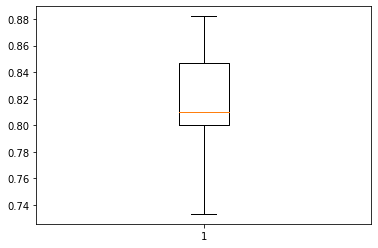

In [ ]:
#KFold and cross_val_score on Logistic Regression Model under Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = lr_under, X = X_train, y = y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
lr_scores_under_train = model_performance_classification_sklearn(lr_under, X_train, y_train)
print("Training performance:")
lr_scores_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.525432,0.970287,0.249145,0.396483


**Observations**

While the recall score is very good, the precision and accuracy of this model remains low.

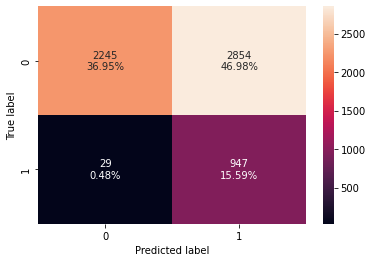

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(lr_under, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 2,245

*  **True Positives (TP):** Correctly predicted 947

* **False Positives (FP):** Incorrectly predicted 2,854 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 29 (Type II error)

In [ ]:
# Calculating different metrics on train set
lr_scores_under_val = model_performance_classification_sklearn(lr_under, X_val, y_val)
print("Training performance:")
lr_scores_under_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.528134,0.966258,0.25,0.397226


**Observations**

Same as above - good recall bbut weak precision and accuracy

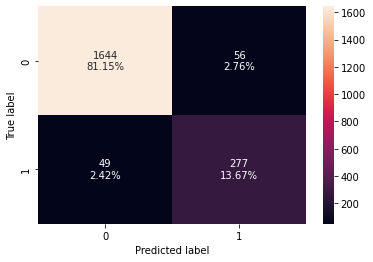

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_oversampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,644

*  **True Positives (TP):** Correctly predicted 277

* **False Positives (FP):** Incorrectly predicted 56 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 49 (Type II error)

**Decision Tree (UnderSampling)**

In [ ]:
#Training the basic logistic regression model with training set
dt_under = DecisionTreeClassifier(random_state=1, class_weight={0: 15, 1: 85})
dt_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(class_weight={0: 15, 1: 85}, random_state=1)

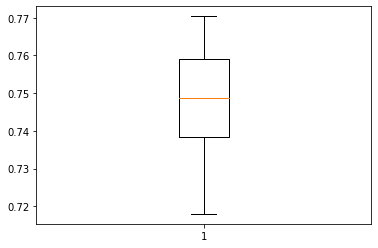

In [ ]:
#KFold and cross_val_score on Decision Tree Classifier Model under Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = dt_under, X = X_train, y = y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
dt_scores_under_train = model_performance_classification_sklearn(dt_under, X_train, y_train)
print("Training performance:")
dt_scores_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.918025,1.0,0.662144,0.796735


**Observations**

This model is overfit. Has a 100% recall, high accuracy, but poor precision score.

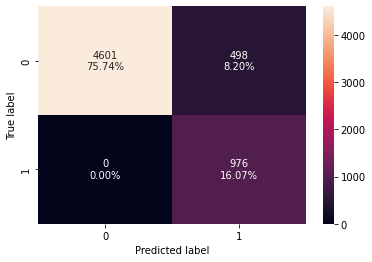

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(dt_under, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 4,601

*  **True Positives (TP):** Correctly predicted 976

* **False Positives (FP):** Incorrectly predicted 498 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 0 (Type II error)

In [ ]:
# Calculating different metrics on train set
dt_scores_under_val = model_performance_classification_sklearn(dt_under, X_val, y_val)
print("Validation performance:")
dt_scores_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.889437,0.874233,0.608974,0.717884


**Observations**

The accuracy and recall scores are very good, but the precision score is low and can be improved in other models

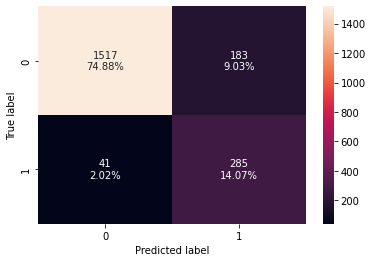

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(dt_under, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,517

*  **True Positives (TP):** Correctly predicted 285

* **False Positives (FP):** Incorrectly predicted 183 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 41 (Type II error)

**Random Forest (UnderSampling)**

In [ ]:
#Training the basic logistic regression model with training set
rf_under = RandomForestClassifier(random_state=1, class_weight={0: 15, 1: 85})
rf_under.fit(X_train_un, y_train_un)

RandomForestClassifier(class_weight={0: 15, 1: 85}, random_state=1)

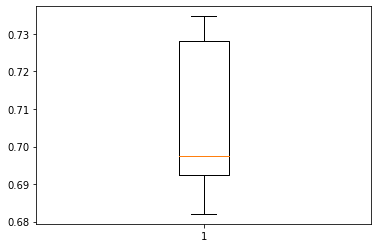

In [ ]:
#KFold and cross_val_score on Decision Tree Classifier Model under Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = rf_under, X = X_train, y = y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
rf_scores_under_train = model_performance_classification_sklearn(rf_under, X_train, y_train)
print("Training performance:")
rf_scores_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.953251,1.0,0.774603,0.872987


**Observations**

Given the high recall, this model is most likely overfit.

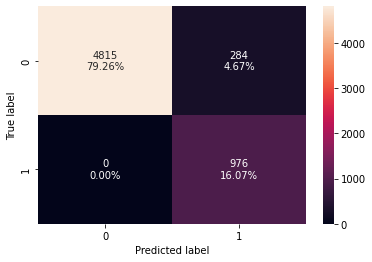

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_under, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 4,815

*  **True Positives (TP):** Correctly predicted 976

* **False Positives (FP):** Incorrectly predicted 284 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 0 (Type II error)

In [ ]:
# Calculating different metrics on train set
rf_scores_under_val = model_performance_classification_sklearn(rf_under, X_val, y_val)
print("Validation performance:")
rf_scores_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.935834,0.91411,0.745,0.820937


**Observations**

This model has a strong recall score, but does not have a great precision at just 75%.

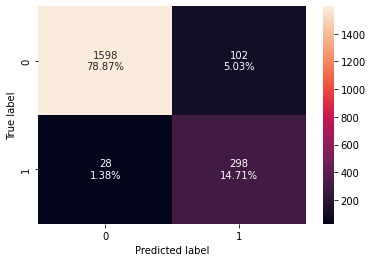

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_under, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,598

*  **True Positives (TP):** Correctly predicted 298

* **False Positives (FP):** Incorrectly predicted 102 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 28 (Type II error)

**Gradient Boost (UnderSampling)**

In [ ]:
#Training the basic gradient boost model with training set
gb_undersampled = GradientBoostingClassifier(random_state=1)
gb_undersampled.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

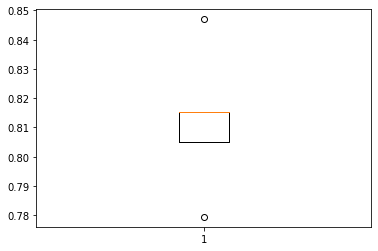

In [ ]:
#KFold and cross_val_score on Gradient Boost Model under Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = gb_undersampled, X = X_train, y = y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
gb_scores_under_train = model_performance_classification_sklearn(gb_undersampled, X_train, y_train)
print("Training performance:")
gb_scores_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.944362,0.980533,0.75,0.849911


**Observations**

This is a strong model, showing a 98% recall with a 94% accuracy, however, precision could be stronger.

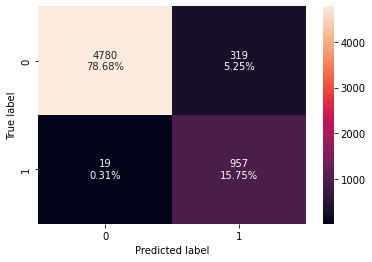

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_undersampled, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 4,780

*  **True Positives (TP):** Correctly predicted 957

* **False Positives (FP):** Incorrectly predicted 319 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 19 (Type II error)

In [ ]:
# Calculating different metrics on validation set
gb_scores_under_val = model_performance_classification_sklearn(gb_undersampled, X_val, y_val)
print("Validation performance:")
gb_scores_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.935341,0.960123,0.726218,0.826948


**Observations**

This model lost a few points for all metrics as compared to the training set for this particular model.

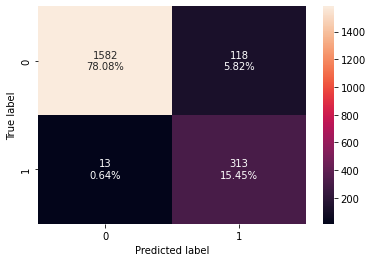

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_undersampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,582

*  **True Positives (TP):** Correctly predicted 313

* **False Positives (FP):** Incorrectly predicted 118 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 13 (Type II error)

**AdaBoost (UnderSampling)**

In [ ]:
#Training the basic gradient boost model with training set
ada_undersampled = AdaBoostClassifier(random_state=1)
ada_undersampled.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

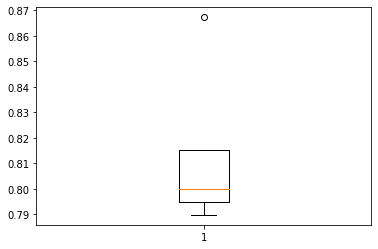

In [ ]:
#KFold and cross_val_score on AdaBoost Model under Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = ada_undersampled, X = X_train, y = y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
ada_scores_under_train = model_performance_classification_sklearn(ada_undersampled, X_train, y_train)
print("Training performance:")
ada_scores_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.929053,0.952869,0.707224,0.811873


**Observations**

Low precision but very high accuracy and recall scores.

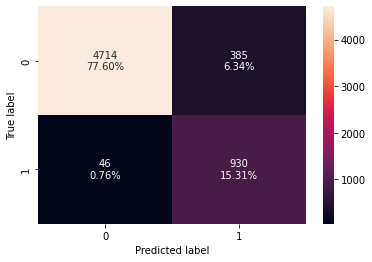

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_undersampled, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 4,714

*  **True Positives (TP):** Correctly predicted 930

* **False Positives (FP):** Incorrectly predicted 385 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 46 (Type II error)

In [ ]:
# Calculating different metrics on validation set
ada_scores_under_val = model_performance_classification_sklearn(ada_undersampled, X_val, y_val)
print("Validation performance:")
ada_scores_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.928924,0.960123,0.704955,0.812987


**Observations**

Again, this model has a great recall and accuracy score but does not score so well in terms of precision.

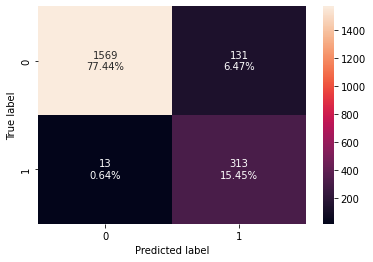

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_undersampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,569

*  **True Positives (TP):** Correctly predicted 313

* **False Positives (FP):** Incorrectly predicted 131 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 13 (Type II error)

**Bagging (UnderSampling)**

In [ ]:
#Training the baggind model with undersampling on the training set
bagging_undersampled = BaggingClassifier(random_state=1)
bagging_undersampled.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

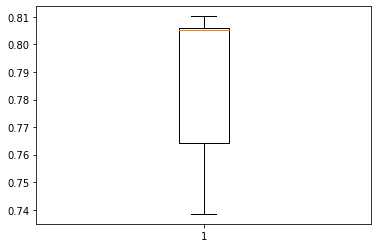

In [ ]:
#KFold and cross_val_score on bagging Model under Sample
scoring = "recall"
# Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
cv_result_bfr = cross_val_score(estimator = bagging_undersampled, X = X_train, y = y_train, scoring = scoring, cv = kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
bagging_scores_under_train = model_performance_classification_sklearn(bagging_undersampled, X_train, y_train)
print("Training performance:")
bagging_scores_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.944198,0.990779,0.745567,0.850858


**Observations**

Very high recall and accuracy score but does not score so well in terms of precision.

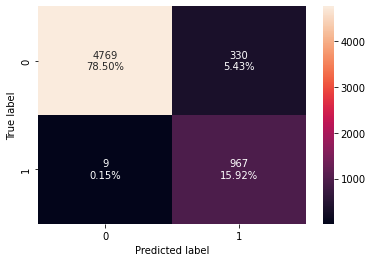

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_undersampled, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 4,769

*  **True Positives (TP):** Correctly predicted 967

* **False Positives (FP):** Incorrectly predicted 330 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 9 (Type II error)

In [ ]:
# Calculating different metrics on validation set
ada_scores_under_val = model_performance_classification_sklearn(ada_undersampled, X_val, y_val)
print("Validation performance:")
ada_scores_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.928924,0.960123,0.704955,0.812987


**Observations**

Very high recall and accuracy score but does not score so well in terms of precision.

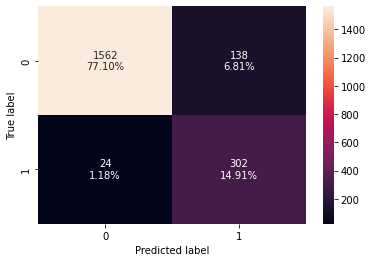

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_undersampled, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,562

*  **True Positives (TP):** Correctly predicted 302

* **False Positives (FP):** Incorrectly predicted 138 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 24 (Type II error)

In [ ]:
# defining list of models
under_models = [lr_under, dt_under, rf_under, gb_undersampled, ada_undersampled, bagging_undersampled]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []
f1_train = []
f1_val = []

# looping through all the under sampled models to get the accuracy, f1, recall and precision scores
for model in under_models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0],2))
    acc_val.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_val.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_val.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_val.append(np.round(j[7],2))

In [ ]:
# create dataframe
comparison_frame = pd.DataFrame({"Model (Training Data)":["Logistic Regression", 'Decision Tree', 'Random Forest','Gradient Boost', 'AdaBoost','Bagging'],
                                          "Accuracy" : acc_train, "Recall": recall_train, "Precision" :precision_train,"F1": f1_train}) 
comparison_frame

,Model (Training Data),Accuracy,Recall,Precision,F1
0,Logistic Regression,0.53,0.97,0.25,0.40
1,Decision Tree,0.92,1.00,0.66,0.80
2,Random Forest,0.95,1.00,0.77,0.87
3,Gradient Boost,0.94,0.98,0.75,0.85
4,AdaBoost,0.93,0.95,0.71,0.81
5,Bagging,0.94,0.99,0.75,0.85


In [ ]:
# create dataframe
comparison_frame = pd.DataFrame({"Model (Validation Data)":["Logistic Regression", 'Decision Tree', 'Random Forest','Gradient Boost', 'AdaBoost','Bagging'],
                                          "Accuracy" : acc_val, "Recall": recall_val, "Precision" :precision_val,"F1": f1_val}) 
comparison_frame

,Model (Validation Data),Accuracy,Recall,Precision,F1
0,Logistic Regression,0.53,0.97,0.25,0.40
1,Decision Tree,0.89,0.87,0.61,0.72
2,Random Forest,0.94,0.91,0.74,0.82
3,Gradient Boost,0.94,0.96,0.73,0.83
4,AdaBoost,0.93,0.96,0.70,0.81
5,Bagging,0.92,0.93,0.69,0.79


**Observations**

In terms of recall score, the following models ranked the highest:

* Logistic regression (but low accuracy and precision)
* Gradient Boost (high accuracy and decent precision)
* AdaBoost (high accuracy and decent precision but lower than Gradient Boost)

**Hyperparameter tuning using random search**

**Gradient Boost using Random Search CV**

In [ ]:
#Hypertuned Gradient Boost
hypertuned_gb = GradientBoostingClassifier(random_state=1)

#Parameters for GridSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1]
}

#Scoring parameters
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = hypertuned_gb, param_distributions =param_grid, n_jobs = -1, n_iter =50, scoring = scorer, cv = 3, random_state = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

#Output of the best paramters with the cv score
print("The best parameters are:" , randomized_cv.best_params_, "and the CV score is:", randomized_cv.best_score_)

The best parameters are: {'n_estimators': 80, 'learning_rate': 0.2} and the CV score is: 0.8503948403334906


In [ ]:
#Identify the best estimator from the hypertuned Gradient Boost model
ht_gb = randomized_cv.best_estimator_

In [ ]:
#Fit model on training data
ht_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=80, random_state=1)

In [ ]:
#Calculate metrics on train set
print("Training performance:")
gradient_random_train = model_performance_classification_sklearn(ht_gb, X_train, y_train)
gradient_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.981893,0.929303,0.956751,0.942827


**Observations**

This model has a very good recall score and high accuracy and precision scores. While the recall scored a bit as compared to the non-hypertuned gradient boost, both the accuracy and precision scores have improved.

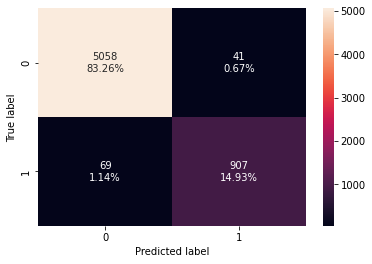

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ht_gb, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 5,058

*  **True Positives (TP):** Correctly predicted 907

* **False Positives (FP):** Incorrectly predicted 41 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 69 (Type II error)

In [ ]:
#Calculate metrics on validation set
print("Validation performance:")
gradient_random_val = model_performance_classification_sklearn(ht_gb, X_val, y_val)
gradient_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.972359,0.883436,0.941176,0.911392


**Observations**

The recall score is a bit lower for the hypertuned model, but the accuracy and precision have both improved.

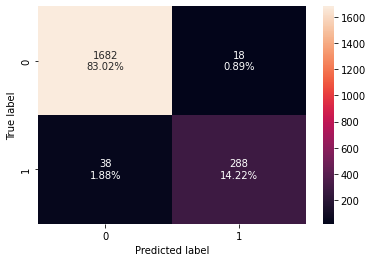

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ht_gb, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,682

*  **True Positives (TP):** Correctly predicted 288

* **False Positives (FP):** Incorrectly predicted 18 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 38 (Type II error)

**Gradient Boost (OverSampling) using Random Search CV**

In [ ]:
#Hypertuned Gradient Boost with OverSampling
hypertuned_gb_over = GradientBoostingClassifier(random_state=1)

#Parameters for GridSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1]
}

#Scoring parameters
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = hypertuned_gb_over, param_distributions =param_grid, n_jobs = -1, n_iter =50, scoring = scorer, cv = 3, random_state = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

#Output of the best paramters with the cv score
print("The best parameters are:" , randomized_cv.best_params_, "and the CV score is:", randomized_cv.best_score_)

The best parameters are: {'n_estimators': 50, 'learning_rate': 0.05} and the CV score is: 0.9364635483386999


In [ ]:
#Identify the best estimator from the hypertuned Gradient Boost with oversampling model
ht_gb_over = randomized_cv.best_estimator_

In [ ]:
#Fit model on training data
ht_gb_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=1)

In [ ]:
#Calculate metrics on train set
print("Training performance:")
gradient_random_train = model_performance_classification_sklearn(ht_gb_over, X_train_over, y_train_over)
gradient_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.947343,0.958619,0.937476,0.94793


**Observations**

High scores for all metrics

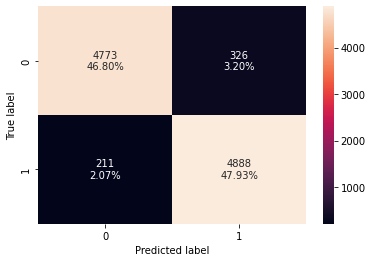

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ht_gb_over, X_train_over, y_train_over)

* **True Negatives (TN):** Correctly predicted 4,773

*  **True Positives (TP):** Correctly predicted 4,888

* **False Positives (FP):** Incorrectly predicted 326 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 211 (Type II error)

In [ ]:
#Calculate metrics on validation set
print("Validation performance:")
gradient_random_val = model_performance_classification_sklearn(ht_gb_over, X_val, y_val)
display(gradient_random_val)

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.92843,0.889571,0.726817,0.8


**Observations**

Recall score dropped and precision dropped significantly

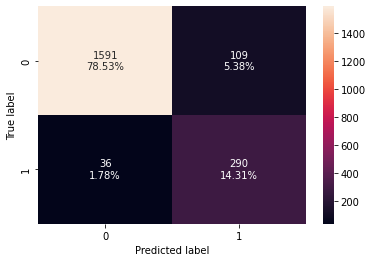

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ht_gb_over, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,591

*  **True Positives (TP):** Correctly predicted 290

* **False Positives (FP):** Incorrectly predicted 109 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 36 (Type II error)

**Gradient Boost (UnderSampling) using Random Search CV**

In [ ]:
#Hypertuned Gradient Boost with UnderSampling
hypertuned_gb_under = GradientBoostingClassifier(random_state=1)

#Parameters for GridSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1]
}

#Scoring parameters
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = hypertuned_gb_under, param_distributions =param_grid, n_jobs = -1, n_iter =50, scoring = scorer, cv = 3, random_state = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

#Output of the best paramters with the cv score
print("The best parameters are:" , randomized_cv.best_params_, "and the CV score is:", randomized_cv.best_score_)

The best parameters are: {'n_estimators': 80, 'learning_rate': 0.2} and the CV score is: 0.9538996381941166


In [ ]:
#Identify the best estimator from the hypertuned Gradient Boost with undersampling model
ht_gb_under = randomized_cv.best_estimator_

In [ ]:
#Fit model on training data
ht_gb_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=80, random_state=1)

In [ ]:
#Calculate metrics on train set
print("Training performance:")
gradient_random_train = model_performance_classification_sklearn(ht_gb_under, X_train_un, y_train_un)
gradient_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.988217,0.990779,0.985729,0.988247


**Observations**

Very high metrics all around

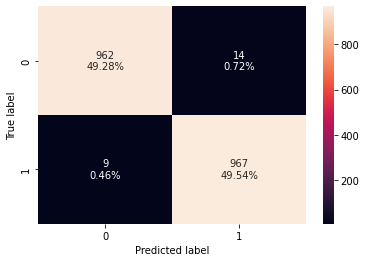

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ht_gb_under, X_train_un, y_train_un)

* **True Negatives (TN):** Correctly predicted 962

*  **True Positives (TP):** Correctly predicted 967

* **False Positives (FP):** Incorrectly predicted 14 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 9 (Type II error)

In [ ]:
#Calculate metrics on validation set
print("Validation performance:")
gradient_random_val = model_performance_classification_sklearn(ht_gb_under, X_val, y_val)
gradient_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.939289,0.972393,0.735499,0.837517


**Observations**

Recall and accuracy remain high at the expense of precision.

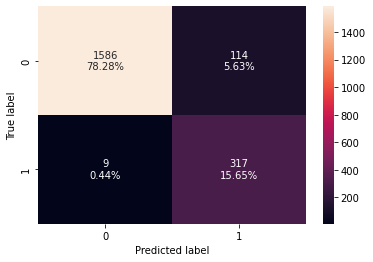

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ht_gb_under, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,586

*  **True Positives (TP):** Correctly predicted 317

* **False Positives (FP):** Incorrectly predicted 114 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 9 (Type II error)

**Hypertuned AdaBoost**

In [ ]:
#Hypertuned AdaBoost model
hypertuned_ada = AdaBoostClassifier(random_state=1)

#Parameters for GridSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = hypertuned_ada, param_distributions = param_grid, n_jobs = -1, n_iter = 50, scoring = scorer, cv = 3, random_state = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

#Output of the best paramters with the cv score
print("The best parameters are:" , randomized_cv.best_params_, "and the CV score is:", randomized_cv.best_score_)

The best parameters are: {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} and the CV score is: 0.8534560327198365


In [ ]:
#Identify the best estimator from the hypertuned Gradient Boost model
ada_tuned = randomized_cv.best_estimator_

In [ ]:
#Fit model on training data
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [ ]:
#Calculate metrics on train set
print("Training performance:")
ada_random_train = model_performance_classification_sklearn(ada_tuned, X_train, y_train)
ada_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996049,0.987705,0.987705,0.987705


**Observations**

Very high scores for all metrics

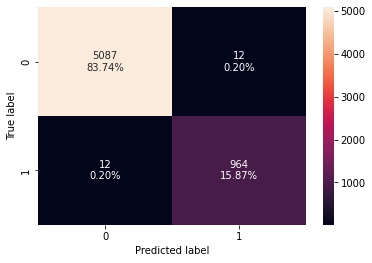

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 5,087

*  **True Positives (TP):** Correctly predicted 964

* **False Positives (FP):** Incorrectly predicted 12 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 12 (Type II error)

In [ ]:
#Calculate metrics on validation set
print("Validation performance:")
ada_random_val = model_performance_classification_sklearn(ada_tuned, X_val, y_val)
ada_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.968904,0.877301,0.925566,0.900787


**Observations**

All metrics look solid, although recall dropped below 90%

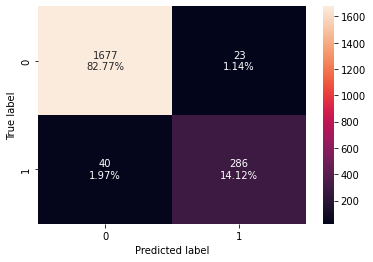

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,677

*  **True Positives (TP):** Correctly predicted 286

* **False Positives (FP):** Incorrectly predicted 23 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 40 (Type II error)

**Hypertuned AdaBoost OverSampling with RandomSearchCV**

In [ ]:
#Hypertuned AdaBoost model
hypertuned_ada_over = AdaBoostClassifier(random_state=1)

#Parameters for GridSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = hypertuned_ada_over, param_distributions = param_grid, n_jobs = -1, n_iter = 50, scoring = scorer, cv = 3, random_state = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

#Output of the best paramters with the cv score
print("The best parameters are:" , randomized_cv.best_params_, "and the CV score is:", randomized_cv.best_score_)

The best parameters are: {'n_estimators': 90, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} and the CV score is: 0.9305807337649599


In [ ]:
#Identify the best estimator from the hypertuned AdaBoost with oversampling model
ada_tuned_over = randomized_cv.best_estimator_

In [ ]:
#Fit model on training data
ada_tuned_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=90, random_state=1)

In [ ]:
#Calculate metrics on train set
print("Training performance:")
ht_ada_random_train = model_performance_classification_sklearn(ada_tuned_over, X_train_over, y_train_over)
ht_ada_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.933614,0.956658,0.914511,0.93511


**Observations**

All scores above 90% for all metrics

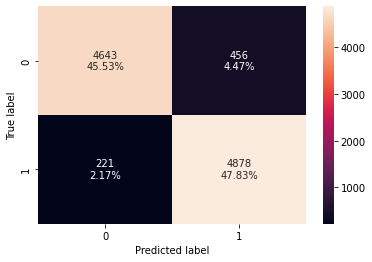

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned_over, X_train_over, y_train_over)

* **True Negatives (TN):** Correctly predicted 4,643

*  **True Positives (TP):** Correctly predicted 4,878

* **False Positives (FP):** Incorrectly predicted 456 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 221 (Type II error)

In [ ]:
#Calculate metrics on validation set
print("Validation performance:")
ht_ada_random_val = model_performance_classification_sklearn(ada_tuned_over, X_val, y_val)
ht_ada_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.908687,0.886503,0.661327,0.757536


**Observations**

Recall and accuracy dropped a few points and precision is very low

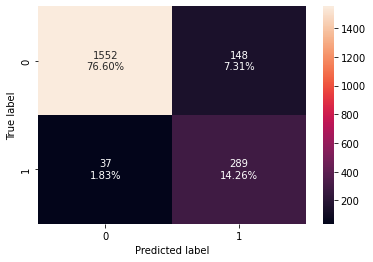

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned_over, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,552

*  **True Positives (TP):** Correctly predicted 289

* **False Positives (FP):** Incorrectly predicted 148 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 37 (Type II error)

**Hypertuned AdaBoost UnderSampling with RandomSearchCV**

In [ ]:
#Hypertuned AdaBoost model undersampled
hypertuned_ada_under = AdaBoostClassifier(random_state=1)

#Parameters for GridSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = hypertuned_ada_under, param_distributions = param_grid, n_jobs = -1, n_iter = 50, scoring = scorer, cv = 3, random_state = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

#Output of the best paramters with the cv score
print("The best parameters are:" , randomized_cv.best_params_, "and the CV score is:", randomized_cv.best_score_)

The best parameters are: {'n_estimators': 90, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} and the CV score is: 0.9539090766084631


In [ ]:
#Identify the best estimator from the hypertuned Gradient Boost with oversampling model
ada_tuned_under = randomized_cv.best_estimator_

In [ ]:
#Fit model on training data
ada_tuned_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

In [ ]:
#Calculate metrics on train set
print("Training performance:")
ht_ada_under_random_train = model_performance_classification_sklearn(ada_tuned_under, X_train_un, y_train_un)
ht_ada_under_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.986168,0.992828,0.979778,0.98626


**Observations**

Very strong scores for all metrics

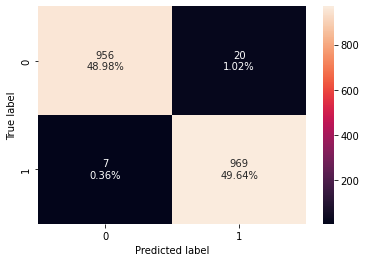

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned_under, X_train_un, y_train_un)

* **True Negatives (TN):** Correctly predicted 956

*  **True Positives (TP):** Correctly predicted 969

* **False Positives (FP):** Incorrectly predicted 20 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 7 (Type II error)

In [ ]:
#Calculate metrics on validation set
print("Validation performance:")
ht_ada_under_random_val = model_performance_classification_sklearn(ada_tuned_under, X_val, y_val)
ht_ada_under_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.938796,0.969325,0.734884,0.835979


**Observations**

Great recall and accuracy, but precision is only 73%

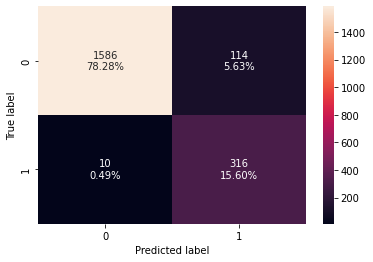

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned_under, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,586

*  **True Positives (TP):** Correctly predicted 316

* **False Positives (FP):** Incorrectly predicted 114 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 10 (Type II error)

**Hypertuned Bagging Classifier**

In [ ]:
#Hypertuned Bagging Classifier
hypertuned_bagging = BaggingClassifier(random_state=1)

#Parameters for GridSearchCV
param_grid = {
              "n_estimators":np.arange(10,60,10),
              "max_features": [0.7,0.8,0.9],
              "max_samples": [0.7,0.8,0.9], 
             }

#Scoring parameters
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = hypertuned_bagging, param_distributions =param_grid, n_jobs = -1, n_iter =50, scoring = scorer, cv = 3, random_state = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

#Output of the best paramters with the cv score
print("The best parameters are:" , randomized_cv.best_params_, "and the CV score is:", randomized_cv.best_score_)

The best parameters are: {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.9} and the CV score is: 0.8216957684442346


In [ ]:
#Identify the best estimator from the hypertuned Gradient Boost model
bagging_tuned = randomized_cv.best_estimator_

In [ ]:
#Fit model on training data
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [ ]:
#Calculate metrics on train set
print("Training performance:")
ht_bag_train = model_performance_classification_sklearn(bagging_tuned, X_train, y_train)
ht_bag_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999835,0.998975,1.0,0.999487


**Observations**

This model is overfit as it has almost perfect scores for accuracy and recall with a precision of 100%

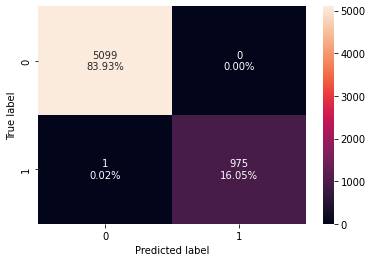

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_tuned, X_train, y_train)

* **True Negatives (TN):** Correctly predicted 5,099

*  **True Positives (TP):** Correctly predicted 975

* **False Positives (FP):** Incorrectly predicted 0 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 1 (Type II error)

In [ ]:
#Calculate metrics on validation set
print("Validation performance:")
ht_bag_val = model_performance_classification_sklearn(bagging_tuned, X_val, y_val)
ht_bag_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.961994,0.846626,0.910891,0.877583


**Observations**

Precision has come up to be over 90% but recall has dropped to 85%

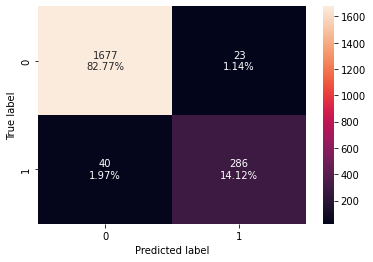

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,677

*  **True Positives (TP):** Correctly predicted 286

* **False Positives (FP):** Incorrectly predicted 23 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 40 (Type II error)

**Hypertuned Bagging (OverSampling) with RandomSearchCV**

In [ ]:
#Hypertuned Bagging Classifier with oversampling
hypertuned_bagging_over = BaggingClassifier(random_state=1)

#Parameters for GridSearchCV
param_grid = {
              "n_estimators":np.arange(10,60,10),
              "max_features": [0.7,0.8,0.9],
              "max_samples": [0.7,0.8,0.9], 
             }

#Scoring parameters
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = hypertuned_bagging_over, param_distributions =param_grid, n_jobs = -1, n_iter =50, scoring = scorer, cv = 3, random_state = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

#Output of the best paramters with the cv score
print("The best parameters are:" , randomized_cv.best_params_, "and the CV score is:", randomized_cv.best_score_)

The best parameters are: {'n_estimators': 50, 'max_samples': 0.7, 'max_features': 0.8} and the CV score is: 0.9566651663608351


In [ ]:
#Identify the best estimator from the hypertuned bagging with oversampling model
bagging_tuned_over = randomized_cv.best_estimator_

In [ ]:
#Fit model on training data
bagging_tuned_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.7, n_estimators=50,
                  random_state=1)

In [ ]:
#Calculate metrics on train set
print("Training performance:")
ht_bag_over_random_train = model_performance_classification_sklearn(bagging_tuned_over, X_train_over, y_train_over)
ht_bag_over_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999706,1.0,0.999412,0.999706


**Observations**

This model is overfit

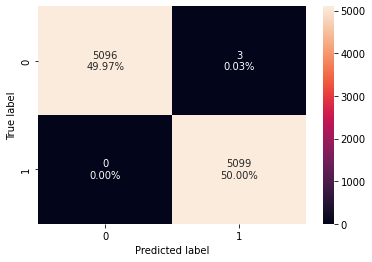

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_tuned_over, X_train_over, y_train_over)

* **True Negatives (TN):** Correctly predicted 5,096

*  **True Positives (TP):** Correctly predicted 5,099

* **False Positives (FP):** Incorrectly predicted 3 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 3 (Type II error)

In [ ]:
#Calculate metrics on validation set
print("Validation performance:")
ht_bag_over_random_val = model_performance_classification_sklearn(bagging_tuned_over, X_val, y_val)
ht_bag_over_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.962981,0.898773,0.874627,0.886536


**Observations**

Strong scores for all metrics

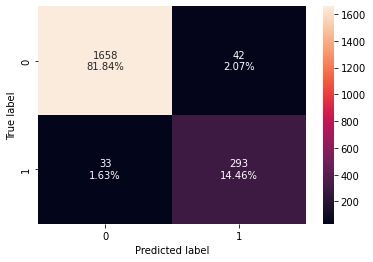

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_tuned_over, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,658

*  **True Positives (TP):** Correctly predicted 293

* **False Positives (FP):** Incorrectly predicted 42 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 33 (Type II error)

**Hypertuned Bagging (UnderSampling) with RandomSearchCV**

In [ ]:
#Hypertuned Bagging Classifier with undersampling
hypertuned_bagging_under = BaggingClassifier(random_state=1)

#Parameters for GridSearchCV
param_grid = {
              "n_estimators":np.arange(10,60,10),
              "max_features": [0.7,0.8,0.9],
              "max_samples": [0.7,0.8,0.9], 
             }

#Scoring parameters
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = hypertuned_bagging_under, param_distributions =param_grid, n_jobs = -1, n_iter =50, scoring = scorer, cv = 3, random_state = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

#Output of the best paramters with the cv score
print("The best parameters are:" , randomized_cv.best_params_, "and the CV score is:", randomized_cv.best_score_)

The best parameters are: {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 0.7} and the CV score is: 0.9457102406795658


In [ ]:
#Identify the best estimator from the hypertuned bagging with undersampling model
bagging_tuned_under = randomized_cv.best_estimator_

In [ ]:
#Fit model on training data
bagging_tuned_under.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=50,
                  random_state=1)

In [ ]:
#Calculate metrics on train set
print("Training performance:")
ht_bag_under_train = model_performance_classification_sklearn(bagging_tuned_under, X_train_un, y_train_un)
ht_bag_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Observations**

This model is overfit

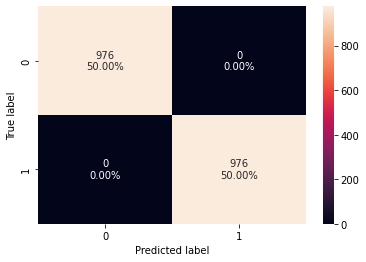

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_tuned_under, X_train_un, y_train_un)

* **True Negatives (TN):** Correctly predicted 976

*  **True Positives (TP):** Correctly predicted 976

* **False Positives (FP):** Incorrectly predicted 0 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 0 (Type II error)

In [ ]:
#Calculate metrics on validation set
print("Validation performance:")
ht_bag_under_val = model_performance_classification_sklearn(bagging_tuned_under, X_val, y_val)
ht_bag_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.925469,0.944785,0.698413,0.803129


**Observations**

Solid accuracy and recall scores but low precision score (below 70%)

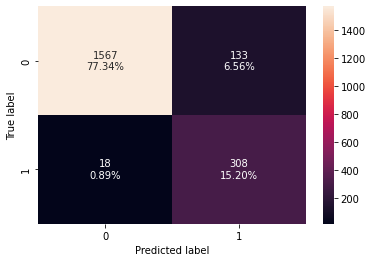

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_tuned_under, X_val, y_val)

* **True Negatives (TN):** Correctly predicted 1,567

*  **True Positives (TP):** Correctly predicted 308

* **False Positives (FP):** Incorrectly predicted 133 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 18 (Type II error)

**Model Comparisons on Validation Data**

In [ ]:
# defining list of models
under_models = [lr_oversampled, dt_oversampled, rf_oversampled, gb_oversampled, ada_oversampled, bagging_oversampled,
                lr_under, dt_under, rf_under, gb_undersampled, ada_undersampled, bagging_undersampled, 
                ht_gb, ht_gb_over, ht_gb_under, ada_tuned, ada_tuned_over, ada_tuned_under, bagging_tuned,
                bagging_tuned_over, bagging_tuned_under]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []
f1_train = []
f1_val = []

# looping through all the under sampled models to get the accuracy, f1, recall and precision scores
for model in under_models:
    j = get_metrics_score(model, False)
    acc_val.append(np.round(j[1],2))
    recall_val.append(np.round(j[3],2))
    precision_val.append(np.round(j[5],2))
    f1_val.append(np.round(j[7],2))

In [ ]:
# create dataframe
comparison_frame = pd.DataFrame({"Model (Validation Data)":["Logistic Regression (OverSample",
                                                            "Logistic Regression (UnderSample)",
                                                            "Decision Tree (OverSample)",
                                                            "Decision Tree (UnderSample)",
                                                            "Random Forest (OverSample)",
                                                            "Random Forest (UnderSample)",
                                                            "Gradient Boost (OverSample)",
                                                            "Gradient Boost (UnderSample)",
                                                            "Hyper Tuned Gradient Boost",
                                                            "Hyper Tuned Gradient Boost (OverSample)",
                                                            "Hyper Tuned Gradient Boost (UnderSample)",
                                                            "AdaBoost (OverSample)",
                                                            "AdaBoost (UnderSample)",
                                                            'Hypertuned AdaBoost', 
                                                            'Hypertuned AdaBoost (OverSample)',
                                                            'Hypertuned AdaBoost (UnderSample)',
                                                            "Bagging (OverSample)",
                                                            "Bagging (UnderSample)",
                                                            'Hyper Tunned Bagging', 
                                                            'Hyper Tunned Bagging (OverSample)',
                                                            'Hyper Tunned Bagging (UnderSample)'],
                                          "Accuracy" : acc_val, "Recall": recall_val, "Precision" :precision_val,"F1": f1_val}) 
comparison_frame

,Model (Validation Data),Accuracy,Recall,Precision,F1
0,Logistic Regression (OverSample,0.52,0.98,0.25,0.40
1,Logistic Regression (UnderSample),0.91,0.72,0.72,0.72
2,Decision Tree (OverSample),0.94,0.75,0.88,0.81
3,Decision Tree (UnderSample),0.96,0.89,0.89,0.89
4,Random Forest (OverSample),0.95,0.88,0.82,0.85
5,Random Forest (UnderSample),0.95,0.85,0.83,0.84
6,Gradient Boost (OverSample),0.53,0.97,0.25,0.40
7,Gradient Boost (UnderSample),0.89,0.87,0.61,0.72
8,Hyper Tuned Gradient Boost,0.94,0.91,0.74,0.82
9,Hyper Tuned Gradient Boost (OverSample),0.94,0.96,0.73,0.83


**Observations**

In terms of recall score, the following models ranked the highest:

* Logistic regression (oversample) (but low accuracy and precision)
* Gradient Boost (oversample) (low accuracy and decent precision)
* Hypertuned AdaBoost (OverSample)	 (high accuracy and decent precision)
* Bagging (UnderSample)(high accuracy and decent precision but lower than Hypertuned AdaBoost (OverSample))
* 10 of the 21 models had a recall score of >=90%

**Make Production Pipeline using Gradient Boost with Undersampling and RandomSearchCV**

In [ ]:
#Create initial pipeline
pipeline_gb = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

#Parameters
param_grid = {'gradientboostingclassifier__n_estimators':[100,200],
              'gradientboostingclassifier__max_depth':[10,20],
              'gradientboostingclassifier__min_samples_leaf': [10,20],
              'gradientboostingclassifier__min_samples_split': [25,35]
              }

#Generate scores
scorer = metrics.make_scorer(metrics.recall_score)

#RandomizedSearchCV
pipeline_gb_rand = RandomizedSearchCV(estimator = pipeline_gb, param_distributions = param_grid, n_jobs = -1, n_iter = 10, scoring = scorer, cv = 5, random_state = 1)

#Fit the parameters into RandomizedSearchCV
pipeline_gb_rand.fit(X_train,y_train)

#Output of the best paramters with the cv score
print("The best parameters are:" , pipeline_gb_rand.best_params_, "and the CV score is:", pipeline_gb_rand.best_score_)

The best parameters are: {'gradientboostingclassifier__n_estimators': 200, 'gradientboostingclassifier__min_samples_split': 25, 'gradientboostingclassifier__min_samples_leaf': 20, 'gradientboostingclassifier__max_depth': 20} and the CV score is: 0.8545054945054945


In [ ]:
#Make hypertuned pipeline
gb_tuned_rand = make_pipeline(StandardScaler(),GradientBoostingClassifier(max_depth = 20, 
                                            min_samples_leaf = 20,
                                            min_samples_split=25,
                                            n_estimators=200,
                                            random_state=1))

#Fit the model on training data
gb_tuned_rand.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=20, min_samples_leaf=20,
                                            min_samples_split=25,
                                            n_estimators=200,
                                            random_state=1))])

In [ ]:
#Calculate metrics
print("Performance:")
pipeline_results = model_performance_classification_sklearn(gb_tuned_rand, X_test, y_test)
pipeline_results

Performance:


,Accuracy,Recall,Precision,F1
0,0.973346,0.901538,0.930159,0.915625


**Observations**

All metrics scored over 90%

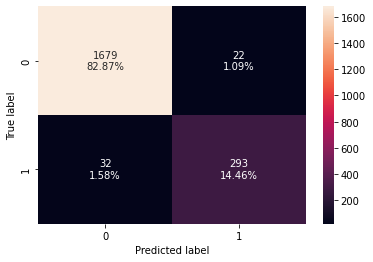

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_tuned_rand, X_test, y_test)

* **True Negatives (TN):** Correctly predicted 1,679

*  **True Positives (TP):** Correctly predicted 9283

* **False Positives (FP):** Incorrectly predicted 22 (Type I error)

* **False Negatives (FN):** Incorrectly predicted 32 (Type II error)

**Business Recommendations**

*   In performing EDA, we saw that the more services customers engage with, the lower the attrition. The bank should focus on selling more products to retain customers.
*   The bank should also incentivize utilization perhaps by offering higher cash back promotions as the more customers use the banks products, the less likely the are to leave.
*   The bank could also partner with the marketing department to target the most at risk types of customers who will attrite such as customers who hold doctorates, have an extremely low revolving balance, and have lower reported transactions.
*   The bank should monitor how many contacts customers have had with the bank over the course of the year. Customers who have contacted the bank are more likely to attrite as they may become dissatisfied with the service or fees the bank charges.



